In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import os
import calendar
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy import integrate
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns
sns.set_style("darkgrid")
import random
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, GRU
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Conv1D, Dropout, MaxPooling1D, LSTM, RepeatVector, Dense, BatchNormalization, Bidirectional
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras.layers import BatchNormalization
from keras import regularizers
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
from keras.callbacks import ModelCheckpoint
from google.colab import files
from keras.models import load_model
from keras.layers import Reshape

seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

https://drive.google.com/file/d/1hpLgeURe0gdBqEAlqsIH7ZSsIzkuMcAH/view?usp=sharing

In [ ]:
pip install gdown==v4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
! gdown --id 1hpLgeURe0gdBqEAlqsIH7ZSsIzkuMcAH

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hpLgeURe0gdBqEAlqsIH7ZSsIzkuMcAH
To: /content/piggy_merged_nitrate_data.20230815163319.csv.gz
100% 18.4M/18.4M [00:00<00:00, 102MB/s] 


In [ ]:
!gunzip -c /content/piggy_merged_nitrate_data.20230815163319.csv.gz > /content/piggy_merged_nitrate_data.20230815163319.csv

In [ ]:
df = pd.read_csv('/content/piggy_merged_nitrate_data.20230815163319.csv', sep='\t')

<ipython-input-5-316af805b826>:1: DtypeWarning: Columns (90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/piggy_merged_nitrate_data.20230815163319.csv', sep='\t')


In [ ]:
df['NO2-N(a) #1-out']

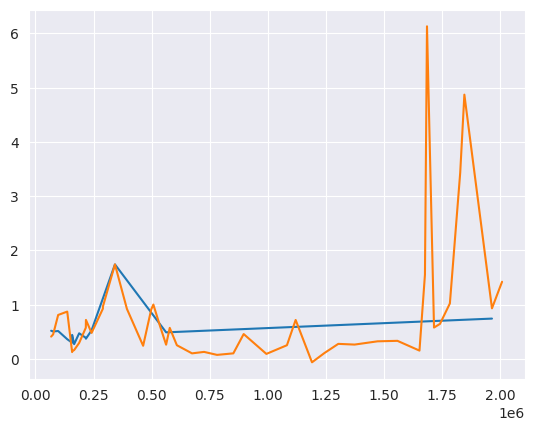

In [ ]:
plt.plot(df['NO2-N(a) #2-out'].dropna())
plt.plot(df['NO2-N(c) #2-out'].dropna())

In [ ]:
import os

# Удаление архивов
os.remove('/content/piggy_merged_nitrate_data.20230815163319.csv.gz')
os.remove('/content/piggy_merged_nitrate_data.20230815163319.csv')

In [ ]:
df = df.drop(463356)

In [ ]:
df = df.drop(['CODMn(a) Anode Tank',
'CODMn(a) #1-out',
'CODMn(a) #2-out',
'CODcr(c) #1-M-out',
'CODcr(c) #2-M-out'], axis=1)

In [ ]:
df.shape

(2072571, 102)

In [ ]:
df.head()

DateTime  Cathode #1  Current #1  Anode #1  Total V #1  \
0  2022/06/06 01:55:11         0.0         0.0       0.0         0.0   
1  2022/06/06 01:55:12         0.0         0.0       0.0         0.0   
2  2022/06/06 01:55:13         0.0         0.0       0.0         0.0   
3  2022/06/06 01:55:14         0.0         0.0       0.0         0.0   
4  2022/06/06 01:55:15         0.0         0.0       0.0         0.0   

   Temp anode #1  Cathode #2  Current #2  Anode #2  Total V #2  ...  \
0            0.0         0.0       0.000      -9.3         0.0  ...   
1            0.0         0.0       0.000      -9.3         0.0  ...   
2            0.0         0.0       0.001      -9.3         0.0  ...   
3            0.0         0.0       0.000      -9.3         0.0  ...   
4            0.0         0.0       0.000      -9.5         0.0  ...   

   COD removal concentration #2-out  COD removal percentage #1-out  \
0                               NaN                            NaN   
1                               NaN                            NaN   
2                               NaN                            NaN   
3                               NaN                            NaN   
4                               NaN                            NaN   

   COD removal percentage #2-out  NO3 removal concentration #1-out  \
0                            NaN                               NaN   
1                            NaN                               NaN   
2                            NaN                               NaN   
3                            NaN                               NaN   
4                            NaN                               NaN   

   NO3 removal concentration #2-out  NO3 removal percentage #1-out  \
0                               NaN                            NaN   
1                               NaN                            NaN   
2                               NaN                            NaN   
3                               NaN                            NaN   
4                               NaN                            NaN   

   NO3 removal percentage #2-out  NO3 removal amount #1-out  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                        NaN   

   NO3 removal amount #2-out  Average temperature  
0                        NaN                  NaN  
1                        NaN                  NaN  
2                        NaN                  NaN  
3                        NaN                  NaN  
4                        NaN                  NaN  

[5 rows x 102 columns]

In [ ]:
df.tail()

DateTime  Cathode #1  Current #1  Anode #1  Total V #1  \
2072567  2023/08/15 10:36:31      -0.425         0.0    -0.467       0.042   
2072568  2023/08/15 10:36:47      -0.425         0.0    -0.467       0.042   
2072569  2023/08/15 10:36:51      -0.425         0.0    -0.467       0.042   
2072570  2023/08/15 10:37:05      -0.425         0.0    -0.467       0.042   
2072571  2023/08/15 10:37:11      -0.425         0.0    -0.467       0.042   

         Temp anode #1  Cathode #2  Current #2  Anode #2  Total V #2  ...  \
2072567           28.4      -0.401      -0.185     0.065      -0.466  ...   
2072568           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072569           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072570           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072571           28.3      -0.401      -0.185     0.065      -0.466  ...   

         COD removal concentration #2-out  COD removal percentage #1-out  \
2072567                               NaN                            NaN   
2072568                               NaN                            NaN   
2072569                               NaN                            NaN   
2072570                               NaN                            NaN   
2072571                               NaN                            NaN   

         COD removal percentage #2-out  NO3 removal concentration #1-out  \
2072567                            NaN                               NaN   
2072568                            NaN                               NaN   
2072569                            NaN                               NaN   
2072570                            NaN                               NaN   
2072571                            NaN                               NaN   

         NO3 removal concentration #2-out  NO3 removal percentage #1-out  \
2072567                               NaN                            NaN   
2072568                               NaN                            NaN   
2072569                               NaN                            NaN   
2072570                               NaN                            NaN   
2072571                               NaN                            NaN   

         NO3 removal percentage #2-out  NO3 removal amount #1-out  \
2072567                            NaN                        NaN   
2072568                            NaN                        NaN   
2072569                            NaN                        NaN   
2072570                            NaN                        NaN   
2072571                            NaN                        NaN   

         NO3 removal amount #2-out  Average temperature  
2072567                        NaN                  NaN  
2072568                        NaN                  NaN  
2072569                        NaN                  NaN  
2072570                        NaN                  NaN  
2072571                        NaN                  NaN  

[5 rows x 97 columns]

In [ ]:
df['timestamp'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
df = df.drop(['BES1 Cathode',
'BES1 Current',
'BES1 Anode',
'BES1 Total',
'BES2 Cathode',
'BES2 Anode',
'BES2 Total',
'BES2 Temp'], axis=1)

In [ ]:
df = df.drop([
'BES1 Temp'], axis=1)

In [ ]:
df = df.drop([
'NO3-N(c) 500L tank',
'CODcr(c) Cathode Tank',
'CODcr(c) #1-out'], axis=1)

In [ ]:
df = df.drop([
'data logger'], axis=1)

In [ ]:
df = df.drop([
'DateTime'], axis=1)

In [ ]:
df['NO2-N(a) Anode Tank'].dropna()

67397      0.512
76037      0.462
97610      0.697
136654     0.386
157702     0.591
166341     0.416
187941     0.731
216620     0.586
217160     0.519
241480     0.693
342042     0.120
562249     0.679
577878     0.540
1964797    0.292
Name: NO2-N(a) Anode Tank, dtype: float64

In [ ]:
df = df.drop([
'NO2-N(a) Anode Tank',
'NO2-N(a) #1-out',
'NH4-N(a) Black Tank',
'NH4-N(a) #1-out',
'pH(c) #1-M-out',
'NO3-N(c) #1-M-out',
'PO4-P(c) #1-M-out',
'NO2-N(c) #1-M-out',
'NH4-N(c) #1-M-out'], axis=1)

In [ ]:
df = df.set_index('timestamp')

In [ ]:
a = ['Cathode #2',
'Current #2',
'Anode #2',
'Total V #2',
'Temp anode #2',
'Cathode pump #2',
'Anode pump#2',
'sludge mixing pump',
'Temp anode storage',
'Cath tank float',
'Anode tank float',
'NO3-N_sensor_Temp',
'NO3-N_sensor_Storage',
'NO3-N_sensor_C2_out',
'pH(a) Anode Tank',
'pH(a) #2-out',
'CODcr(a) Anode Tank',
'CODcr(a) #2-out',
'BOD(a) Anode Tank',
'BOD(a) #2-out',
'PO4(a) Anode Tank',
'PO4(a) #2-out',
'pH(c) Cathode Tank',
'pH(c) #2-out',
'NO3-N(c) Cathode Tank',
'NO3-N(c) #2-out',
'PO4-P(c) Cathode Tank',
'PO4-P(c) #2-out',
'NO2-N(c) Cathode Tank',
'NO2-N(c) #2-out',
'NH4-N(c) Cathode Tank',
'NH4-N(c) #2-out',
'COD removal concentration #2-out',
'NO3 removal concentration #2-out',
'Average temperature']

In [ ]:
a[0]

'Cathode #2'

In [ ]:
df['Cathode #2'].dropna().size

2070834

In [ ]:
for i in a:
  print(df[i].dropna().size)

2070834
2070834
2070834
2070834
2070834
2070834
2070834
2070534
2070404
2070534
2070534
27388
26050
19243
47
48
50
50
26
26
44
45
49
51
56
55
52
52
44
46
45
49
60
60
49


In [ ]:
ds1 = df.iloc[14119:2008219, :].copy()

In [ ]:
ds1.columns

Index(['Cathode #1', 'Current #1', 'Anode #1', 'Total V #1', 'Temp anode #1',
       'Cathode #2', 'Current #2', 'Anode #2', 'Total V #2', 'Temp anode #2',
       'Cathode pump #1', 'Cathode pump #2', 'Anode pump #1', 'Anode pump#2',
       'sludge mixing pump', 'Temp anode storage', 'Cath tank float',
       'Anode tank float', 'Power', 'NO3-N_sensor_Temp',
       'NO3-N_sensor_Storage', 'NO3-N_sensor_C1_out', 'NO3-N_sensor_C2_out',
       'BES2 Current', 'pH(a) Anode Tank', 'pH(a) #1-out', 'pH(a) #2-out',
       'CODcr(a) Anode Tank', 'CODcr(a) #1-out', 'CODcr(a) #2-out',
       'CODcr(a)cent Anode Tank', 'CODcr(a)cent #1-out', 'CODcr(a)cent #2-out',
       'CODMn(a) Anode Tank', 'CODMn(a) #1-out', 'CODMn(a) #2-out',
       'BOD(a) Anode Tank', 'BOD(a) #1-out', 'BOD(a) #2-out',
       'PO4(a) Anode Tank', 'PO4(a) #1-out', 'PO4(a) #2-out',
       'NO2-N(a) #2-out', 'NH4-N(a) #2-out', 'pH(c) Cathode Tank',
       'pH(c) #1-out', 'pH(c) #2-M-out', 'pH(c) #2-out',
       'NO3-N(c) Cathod

In [ ]:
ds1['NO2-N(c) #2-out'].dropna()

timestamp
2022-09-06 13:19:41    0.409
2022-09-08 13:19:41    0.450
2022-09-13 13:19:34    0.808
2022-09-22 14:17:31    0.870
2022-10-05 13:19:44    0.124
2022-10-05 13:19:44    0.144
2022-10-07 13:19:39    0.160
2022-10-12 13:19:44    0.292
2022-10-20 10:17:34    0.573
2022-10-20 13:17:34    0.717
2022-10-26 12:45:32    0.477
2022-11-04 13:35:33    0.924
2022-11-04 13:35:33    0.962
2022-11-10 13:35:30    1.740
2022-11-16 13:35:30    0.920
2022-11-24 13:35:34    0.240
2022-11-28 13:35:44    0.908
2022-11-30 13:35:40    1.000
2022-12-09 13:35:33    0.598
2022-12-15 12:35:33    0.260
2022-12-19 11:21:32    0.570
2022-12-26 11:21:36    0.250
2023-01-10 13:21:34    0.100
2023-01-19 11:47:46    0.127
2023-01-26 13:47:31    0.072
2023-02-03 13:47:31    0.100
2023-02-08 14:10:31    0.456
2023-02-20 14:10:30    0.090
2023-03-02 14:10:31    0.250
2023-03-09 13:10:31    0.716
2023-03-17 13:10:37   -0.065
2023-03-23 14:10:31    0.105
2023-03-30 14:10:30    0.275
2023-04-07 14:10:45    0.262
2023

In [ ]:
ds1['NO2-N(c) #2-M-out'].dropna()

timestamp
2022-09-06 13:19:41    0.595
2022-09-13 13:19:34    0.222
2022-09-22 14:17:31    0.354
2022-10-05 13:19:44    0.284
2022-10-05 13:19:44    0.230
2022-10-07 13:19:39    0.394
2022-10-12 13:19:44    0.326
2023-03-09 13:10:31    0.067
2023-03-17 13:10:37   -0.069
2023-03-30 14:10:30    0.442
2023-05-15 13:19:34    1.860
2023-06-14 13:10:40    0.157
2023-07-19 13:41:46    0.341
2023-07-26 13:19:33    1.280
Name: NO2-N(c) #2-M-out, dtype: float64

In [ ]:
df.iloc[14119, 0]

'2022/08/24 13:19:38'

In [ ]:
del df

In [ ]:
# ds1.loc['2022/12/26 12:00':'2023-01-10 11:59:54', 'Current #1'] = ds1.loc['2022/12/26 12:00':'2023-01-10 11:59:54', 'Total V #1']/50
# ds1.loc['2023/01/10 12:00':'2023-01-19 11:59:50', 'Current #1'] = ds1.loc['2023/01/10 12:00':'2023-01-19 11:59:50', 'Total V #1']/30
# ds1.loc['2023/01/19 12:00':'2023-02-20 11:59:58', 'Current #1'] = ds1.loc['2023/01/19 12:00':'2023-02-20 11:59:58', 'Total V #1']/10
# ds1.loc['2023/02/20 12:00':, 'Current #1'] = ds1.loc['2023/02/20 12:00':, 'Total V #1']/5
ds1.loc['2022/12/26 12:00':'2023-01-10 11:59:54', 'Current #1'] = ds1.loc['2022/12/26 12:00':'2023-01-10 11:59:54', 'Anode #1']/50
ds1.loc['2023/01/10 12:00':'2023-01-19 11:59:50', 'Current #1'] = ds1.loc['2023/01/10 12:00':'2023-01-19 11:59:50', 'Anode #1']/30
ds1.loc['2023/01/19 12:00':'2023-02-20 11:59:58', 'Current #1'] = ds1.loc['2023/01/19 12:00':'2023-02-20 11:59:58', 'Anode #1']/10
ds1.loc['2023/02/20 12:00':, 'Current #1'] = ds1.loc['2023/02/20 12:00':, 'Anode #1']/5

In [ ]:
# ds1 = ds1[~ds1.index.duplicated()]
ds1 = ds1[~ds1.index.duplicated(keep='last')]

In [ ]:
df['Temp anode storage'].max()

175.3

In [ ]:
df['Temp anode storage'].min()

-268.1

In [ ]:
ds1.tail()

Cathode #1  Current #1  Anode #1  Total V #1  \
timestamp                                                           
2023-07-26 13:18:13      -0.116     -0.0444    -0.222       0.106   
2023-07-26 13:18:33      -0.116     -0.0444    -0.222       0.106   
2023-07-26 13:18:53      -0.116     -0.0444    -0.222       0.106   
2023-07-26 13:19:13      -0.116     -0.0444    -0.222       0.106   
2023-07-26 13:19:33      -0.117     -0.0446    -0.223       0.106   

                     Temp anode #1  Cathode #2  Current #2  Anode #2  \
timestamp                                                              
2023-07-26 13:18:13           28.8      -0.399      -0.156    -0.043   
2023-07-26 13:18:33           28.9      -0.398      -0.155    -0.043   
2023-07-26 13:18:53           28.9      -0.399      -0.157    -0.043   
2023-07-26 13:19:13           28.8      -0.400      -0.164    -0.045   
2023-07-26 13:19:33           28.8      -0.400      -0.165    -0.047   

                     Total V #2  Temp anode #2  ...  \
timestamp                                       ...   
2023-07-26 13:18:13      -0.356           28.7  ...   
2023-07-26 13:18:33      -0.355           28.8  ...   
2023-07-26 13:18:53      -0.356           28.8  ...   
2023-07-26 13:19:13      -0.355           28.8  ...   
2023-07-26 13:19:33      -0.353           28.8  ...   

                     COD removal concentration #2-out  \
timestamp                                               
2023-07-26 13:18:13                               NaN   
2023-07-26 13:18:33                               NaN   
2023-07-26 13:18:53                               NaN   
2023-07-26 13:19:13                               NaN   
2023-07-26 13:19:33                              40.0   

                     COD removal percentage #1-out  \
timestamp                                            
2023-07-26 13:18:13                            NaN   
2023-07-26 13:18:33                            NaN   
2023-07-26 13:18:53                            NaN   
2023-07-26 13:19:13                            NaN   
2023-07-26 13:19:33                       5.128205   

                     COD removal percentage #2-out  \
timestamp                                            
2023-07-26 13:18:13                            NaN   
2023-07-26 13:18:33                            NaN   
2023-07-26 13:18:53                            NaN   
2023-07-26 13:19:13                            NaN   
2023-07-26 13:19:33                       2.564103   

                     NO3 removal concentration #1-out  \
timestamp                                               
2023-07-26 13:18:13                               NaN   
2023-07-26 13:18:33                               NaN   
2023-07-26 13:18:53                               NaN   
2023-07-26 13:19:13                               NaN   
2023-07-26 13:19:33                             45.25   

                     NO3 removal concentration #2-out  \
timestamp                                               
2023-07-26 13:18:13                               NaN   
2023-07-26 13:18:33                               NaN   
2023-07-26 13:18:53                               NaN   
2023-07-26 13:19:13                               NaN   
2023-07-26 13:19:33                              24.5   

                     NO3 removal percentage #1-out  \
timestamp                                            
2023-07-26 13:18:13                            NaN   
2023-07-26 13:18:33                            NaN   
2023-07-26 13:18:53                            NaN   
2023-07-26 13:19:13                            NaN   
2023-07-26 13:19:33                      56.918239   

                     NO3 removal percentage #2-out  NO3 removal amount #1-out  \
timestamp                                                                       
2023-07-26 13:18:13                            NaN                        NaN   
2023-07-26 13:18:33                            NaN                

In [ ]:
for column in ['Temp anode #1', 'Temp anode #2', 'Temp anode storage']:
  ds1[column] = ds1[column].apply(lambda x: 40 if x > 40 else x)
  ds1[column] = ds1[column].apply(lambda x: 10 if x < 10 else x)

In [ ]:
ds1['CODcr(a) Anode Tank'].dropna().index.to_series().diff()[1:].mean()

Timedelta('7 days 03:34:27.978723404')

In [ ]:
ds1 = ds1.drop(ds1.index[(ds1.index >= '2022-09-28 04:58:00') & (ds1.index <= '2022-10-05 01:48:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2022-10-13 02:47:00') & (ds1.index <= '2022-10-14 08:17:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2022-12-07 00:02:00') & (ds1.index <= '2022-12-07 23:47:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2022-12-15 17:40:00') & (ds1.index <= '2022-12-16 07:10:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2023-06-17 00:16:00') & (ds1.index <= '2023-06-23 17:30:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2023-07-07 02:00:00') & (ds1.index <= '2023-07-10 19:45:00')])

In [ ]:
ds1.at['2022-10-20 10:17:34', 'COD removal concentration #1-out'] = None
ds1.at['2022-10-20 10:17:34', 'COD removal concentration #2-out'] = None
ds1.at['2022-10-20 10:17:34', 'CODcr(a) #1-out'] = None
ds1.at['2022-10-20 10:17:34', 'CODcr(a) #2-out'] = None
ds1.at['2022-10-20 10:17:34', 'CODcr(a) Anode Tank'] = None

In [ ]:
ds1['COD1'] = ds1['CODcr(a) Anode Tank'] - ds1['CODcr(a) #1-out']
ds1['COD2'] = ds1['CODcr(a) Anode Tank'] - ds1['CODcr(a) #2-out']

In [ ]:
3*24*7

504

In [ ]:
ds1['CODcr(a) Anode Tank'].interpolate().resample('20T').mean()[::504].count()

46

In [ ]:
ds1['CODcr(a) Anode Tank'].dropna().count()

47

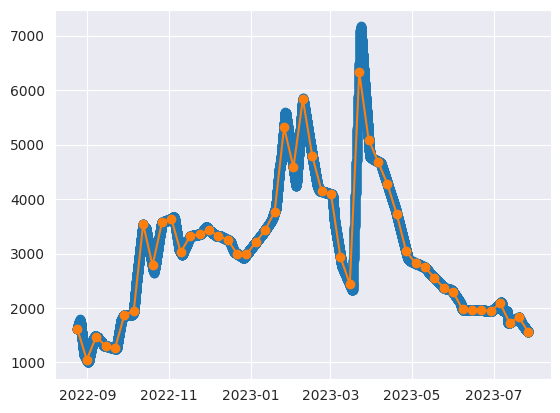

In [ ]:
plt.plot(ds1['CODcr(a) Anode Tank'].interpolate().resample('20T').mean().index, ds1['CODcr(a) Anode Tank'].interpolate().resample('20T').mean(), marker='o')
plt.plot(ds1['CODcr(a) Anode Tank'].interpolate().resample('20T').mean()[::504].index, ds1['CODcr(a) Anode Tank'].interpolate().resample('20T').mean()[::504], marker='o')

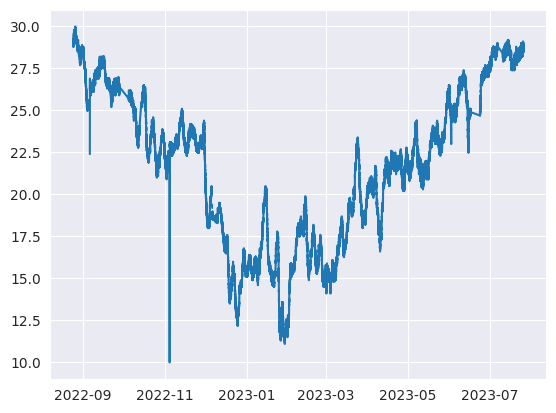

In [ ]:
plt.plot(ds1['Temp anode #2'])

In [ ]:
def replace_outliers_with_nearest(df1, columns, multiplier=3):

    for column in df1.columns:
      Q1 = df1[column].quantile(0.25)
      Q3 = df1[column].quantile(0.75)
      IQR = Q3 - Q1

      lower_bound = Q1 - multiplier * IQR
      upper_bound = Q3 + multiplier * IQR

      df1_copy = df1.copy()
      df1_copy.loc[:, column] = df1[column].apply(lambda x: x if lower_bound <= x <= upper_bound else nearest_non_outlier(df1[column], x, lower_bound, upper_bound))
      df1.loc[:, column] = df1_copy.loc[:, column]

    return df1

def nearest_non_outlier(series, value, lower_bound, upper_bound):
    lower_distance = value - lower_bound
    upper_distance = upper_bound - value

    if lower_distance < upper_distance:
        return lower_bound
    else:
        return upper_bound

df2 = ds1[['Temp anode storage', 'Current #1', 'Temp anode #1', 'Anode #1', 'Cathode #1', 'Total V #1', 'Current #2', 'Temp anode #2', 'Anode #2', 'Cathode #2', 'Total V #2']].copy()
for j in range(1, ds1.asfreq('D').index.size):
  df2.loc[df2.asfreq('D').index[j - 1]:df2.asfreq('D').index[j], ['Temp anode storage', 'Current #1', 'Temp anode #1', 'Anode #1', 'Cathode #1', 'Total V #1', 'Current #2', 'Temp anode #2', 'Anode #2', 'Cathode #2', 'Total V #2']] = replace_outliers_with_nearest(df2.loc[df2.asfreq('D').index[j - 1]:df2.asfreq('D').index[j],
   ['Temp anode storage', 'Current #1', 'Temp anode #1', 'Anode #1', 'Cathode #1', 'Total V #1', 'Current #2', 'Temp anode #2', 'Anode #2', 'Cathode #2', 'Total V #2']],
    ['Temp anode storage', 'Current #1', 'Temp anode #1', 'Anode #1', 'Cathode #1', 'Total V #1', 'Current #2', 'Temp anode #2', 'Anode #2', 'Cathode #2', 'Total V #2'])

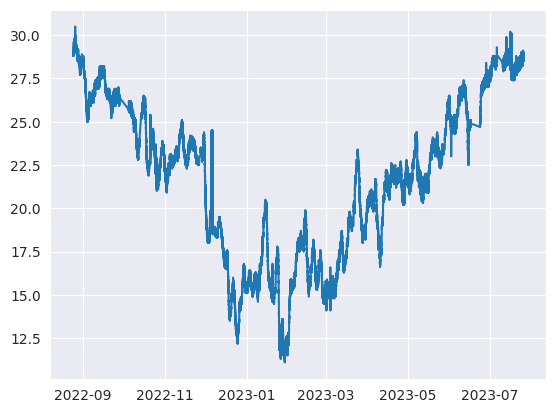

In [ ]:
plt.plot(df2['outTemp anode #2'])

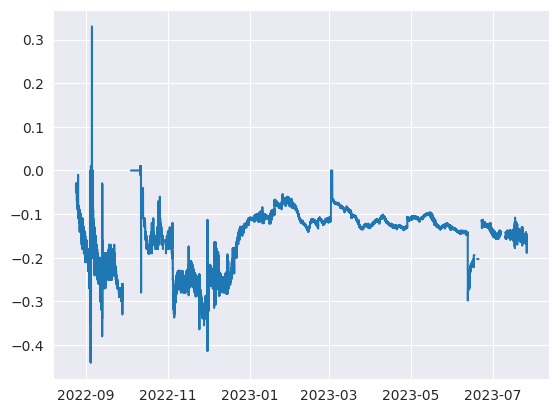

In [ ]:
plt.plot(df2['Current #2'])

In [ ]:
ds2 = ds1.copy()

In [ ]:
ds2 = ds2.drop('note', axis=1)

In [ ]:
for column in ['COD1', 'COD2', 'CODcr(a) #1-out', 'CODcr(a) #2-out', 'CODcr(a) Anode Tank',
               'pH(a) Anode Tank', 'pH(a) #1-out', 'pH(a) #2-out',
               'PO4(a) Anode Tank', 'PO4(a) #1-out', 'PO4(a) #2-out',
               'pH(c) Cathode Tank', 'pH(c) #1-out', 'pH(c) #2-out',
               'NO3-N(c) Cathode Tank', 'NO3-N(c) #1-out',  'NO3-N(c) #2-out',
               'PO4-P(c) Cathode Tank', 'PO4-P(c) #2-out', 'PO4-P(c) #1-out',
               'NO2-N(c) Cathode Tank',  'NO2-N(c) #2-out', 'NO2-N(c) #1-out', 'NH4-N(c) Cathode Tank',  'NH4-N(c) #2-out',
               'NH4-N(c) #1-out']:
  ds2[column].iloc[0] =  ds2[column].dropna().iloc[0]
  ds2[f"inter" + column] = ds2[column].fillna(method='ffill')

In [ ]:
for i in ds2.columns:
  ds2[i].iloc[0] =  ds2[i].dropna().iloc[0]
  ds2[i] =  ds2[i].interpolate()

In [ ]:
df2 = df2.add_prefix('out')
for i in df2.columns:
  df2[i].iloc[0] =  df2[i].dropna().iloc[0]
  df2[i] =  df2[i].interpolate()

In [ ]:
result = pd.concat([ds2, df2], axis=1)

In [ ]:
# result = pd.concat([ds2, df2], axis=1)
result = pd.concat([ds2, df2], axis=1)
result['COD nan'] = ds1['CODcr(a) Anode Tank']
ds30 = result.resample('3H').mean()
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-09-28 04:58:00') & (ds30.index <= '2022-10-05 01:48:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-10-13 02:47:00') & (ds30.index <= '2022-10-14 08:17:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-12-07 00:02:00') & (ds30.index <= '2022-12-07 23:47:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-12-15 17:40:00') & (ds30.index <= '2022-12-16 07:10:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2023-06-17 00:16:00') & (ds30.index <= '2023-06-23 17:30:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2023-07-07 02:00:00') & (ds30.index <= '2023-07-10 19:45:00')])

In [ ]:
ds30['missing_data_flag'] = 0  # Устанавливаем изначально все значения как 0
ds30.loc[(ds30.index >= '2022-09-28 04:58:00') & (ds30.index <= '2022-10-05 01:48:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2022-10-13 02:47:00') & (ds30.index <= '2022-10-14 08:17:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2022-12-07 00:02:00') & (ds30.index <= '2022-12-07 23:47:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2022-12-15 17:40:00') & (ds30.index <= '2022-12-16 07:10:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2023-06-17 00:16:00') & (ds30.index <= '2023-06-23 17:30:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2023-07-07 02:00:00') & (ds30.index <= '2023-07-10 19:45:00'),  'missing_data_flag'] = 1
ds30 = ds30.interpolate()

In [ ]:
ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-09-28 04:58:00') & (ds30.index <= '2022-10-05 01:48:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-10-13 02:47:00') & (ds30.index <= '2022-10-14 08:17:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-12-07 00:02:00') & (ds30.index <= '2022-12-07 23:47:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-12-15 17:40:00') & (ds30.index <= '2022-12-16 07:10:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2023-06-17 00:16:00') & (ds30.index <= '2023-06-23 17:30:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2023-07-07 02:00:00') & (ds30.index <= '2023-07-10 19:45:00')])
ds30 = ds30.interpolate()

In [ ]:
ds22 = ds30['COD nan'].copy()

In [ ]:
ds30['hours_of_day'] = ds30.index.hour
ds30 = pd.get_dummies(ds30, columns=['hours_of_day'], prefix='hour')

In [ ]:
ds30['day_of_week'] = ds30.index.dayofweek
ds30 = pd.get_dummies(ds30, columns=['day_of_week'], prefix='day')

In [ ]:
ds30 = ds30.interpolate()

In [ ]:
for column in ['Temp anode #1', 'Temp anode #2', 'Temp anode storage']:
  ds30[column] = ds30[column].apply(lambda x: 40 if x > 40 else x)
  ds30[column] = ds30[column].apply(lambda x: 10 if x < 10 else x)

In [ ]:
ds1['CODcr(a) #1-out'].mean(), ds1['CODcr(a) #2-out'].mean()

(2321.5106382978724, 2271.1063829787236)

In [ ]:
ds1['CODcr(a) #1-out'].min(), ds1['CODcr(a) #2-out'].min()

(761.0, 710.0)

In [ ]:
ds1['CODcr(a) #1-out'].max(), ds1['CODcr(a) #2-out'].max()

(4840.0, 5640.0)

In [ ]:
for i in ds1.columns:
  print(i)
  print(ds1[i].dropna().count())

Cathode #1
1992248
Current #1
1992248
Anode #1
1992248
Total V #1
1992248
Temp anode #1
1989718
Cathode #2
1992248
Current #2
1992248
Anode #2
1992248
Total V #2
1992248
Temp anode #2
1992248
Cathode pump #1
1992248
Cathode pump #2
1992248
Anode pump #1
1992248
Anode pump#2
1992248
sludge mixing pump
1992248
Temp anode storage
1992248
Cath tank float
1992248
Anode tank float
1992248
Power
1940617
NO3-N_sensor_Temp
25830
NO3-N_sensor_Storage
24552
NO3-N_sensor_C1_out
25830
NO3-N_sensor_C2_out
18182
BES2 Current
49
pH(a) Anode Tank
45
pH(a) #1-out
46
pH(a) #2-out
46
CODcr(a) Anode Tank
47
CODcr(a) #1-out
47
CODcr(a) #2-out
47
CODcr(a)cent Anode Tank
16
CODcr(a)cent #1-out
16
CODcr(a)cent #2-out
16
BOD(a) Anode Tank
26
BOD(a) #1-out
26
BOD(a) #2-out
26
PO4(a) Anode Tank
42
PO4(a) #1-out
43
PO4(a) #2-out
43
NO2-N(a) #2-out
14
NH4-N(a) #2-out
16
pH(c) Cathode Tank
47
pH(c) #1-out
49
pH(c) #2-M-out
14
pH(c) #2-out
49
NO3-N(c) Cathode Tank
54
NO3-N(c) #1-out
53
NO3-N(c) #2-M-out
14
NO3-N(c) #

In [ ]:
ds111 = ds30[['COD2', 'CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',  'interpH(a) #2-out',
       'interPO4(a) Anode Tank',  'interPO4(a) #2-out',
       'interpH(c) Cathode Tank',  'interpH(c) #2-out',
       'interNO3-N(c) Cathode Tank',
       'interNO3-N(c) #2-out', 'interPO4-P(c) Cathode Tank',
       'interPO4-P(c) #2-out', 'interNO2-N(c) Cathode Tank',
       'interNO2-N(c) #2-out', 'interNH4-N(c) Cathode Tank',
       'interNH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cathode pump #2', 'Anode pump#2',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cathode pump #2', 'Anode pump#2',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCOD1', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',  'interpH(a) #1-out',
       'interPO4(a) Anode Tank',  'interPO4(a) #1-out',
       'interpH(c) Cathode Tank',  'interpH(c) #1-out',
       'interNO3-N(c) Cathode Tank',
       'interNO3-N(c) #1-out', 'interPO4-P(c) Cathode Tank',
       'interPO4-P(c) #1-out', 'interNO2-N(c) Cathode Tank',
       'interNO2-N(c) #1-out', 'interNH4-N(c) Cathode Tank',
       'interNH4-N(c) #1-out', 'outTemp anode storage',
  'outCurrent #1', 'outTemp anode #1', 'outAnode #1',
       'outCathode #1', 'Cathode pump #1', 'Anode pump #1',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',  'interpH(a) #2-out',
       'interPO4(a) Anode Tank',  'interPO4(a) #2-out',
  'interpH(c) #2-out', 'interNO2-N(c) Cathode Tank',
       'interNO2-N(c) #2-out',
       'interNH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cathode pump #2', 'Anode pump#2',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank',
       'outTemp anode storage', 'outTemp anode #2', 'outAnode #2']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'COD2',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out',
       'pH(c) Cathode Tank',  'pH(c) #2-out',
       'NO3-N(c) Cathode Tank',
       'NO3-N(c) #2-out', 'PO4-P(c) Cathode Tank',
       'PO4-P(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out', 'NH4-N(c) Cathode Tank',
       'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cathode pump #2', 'Anode pump#2',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'COD2',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out',  'pH(c) #2-out',
       'NO3-N(c) Cathode Tank',
       'NO3-N(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out',
       'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'COD2',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out', 'PO4-P(c) Cathode Tank',
'PO4-P(c) #2-out', 'pH(c) #2-out',
       'NO3-N(c) Cathode Tank',
       'NO3-N(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out',
       'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds30['CODcr(a) #2-out']

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'CODcr(a) #2-out', 'BOD(a) Anode Tank', 'BOD(a) #2-out'
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out', 'PO4-P(c) Cathode Tank',
'PO4-P(c) #2-out', 'pH(c) Cathode Tank', 'pH(c) #2-out',
       'NO3-N(c) Cathode Tank',
       'NO3-N(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out',
       'NH4-N(c) Cathode Tank', 'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'CODcr(a) #2-out',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out', 'PO4-P(c) Cathode Tank',
'PO4-P(c) #2-out', 'pH(c) #2-out',
       'NO3-N(c) Cathode Tank',
       'NO3-N(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out',
       'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'CODcr(a) #2-out', 'BOD(a) Anode Tank', 'BOD(a) #2-out',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out', 'PO4-P(c) Cathode Tank',
'PO4-P(c) #2-out', 'pH(c) Cathode Tank', 'pH(c) #2-out',
       'NO3-N(c) Cathode Tank',
       'NO3-N(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out',
       'NH4-N(c) Cathode Tank', 'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cath tank float',
              'Anode tank float']].copy()

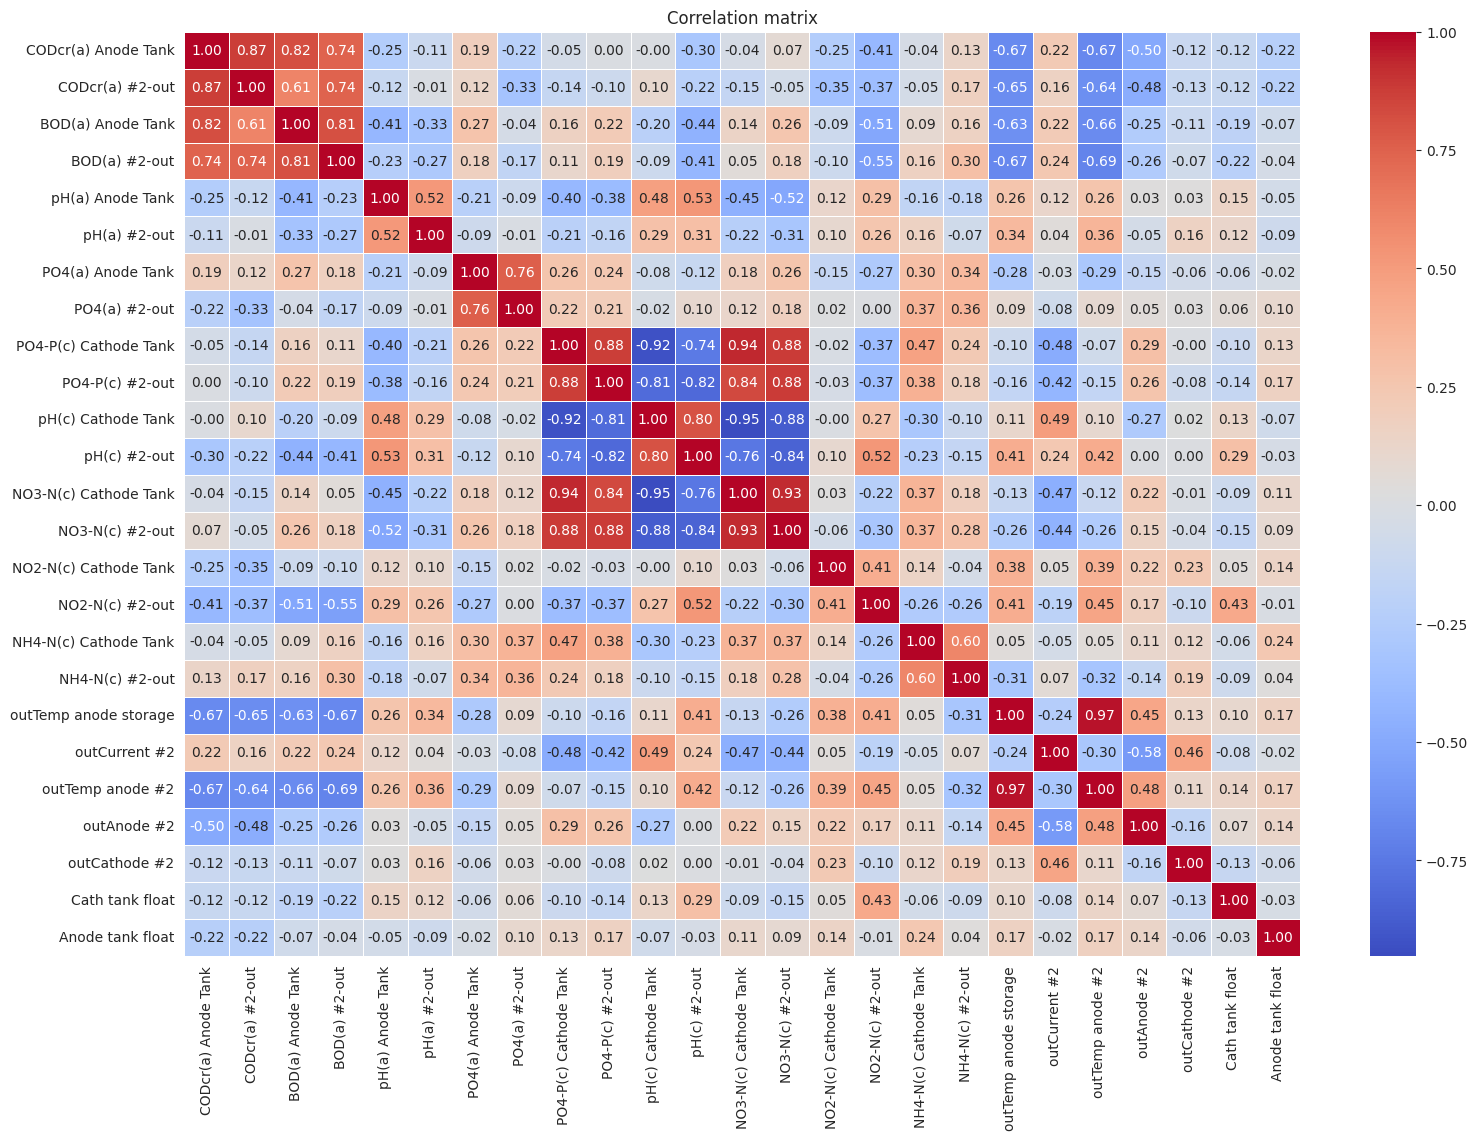

In [ ]:
correlation_matrix = ds111.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [ ]:
[::504]

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'CODcr(a) #2-out',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out', 'pH(c) #2-out',
       'NO3-N(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out',
       'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2']].copy()

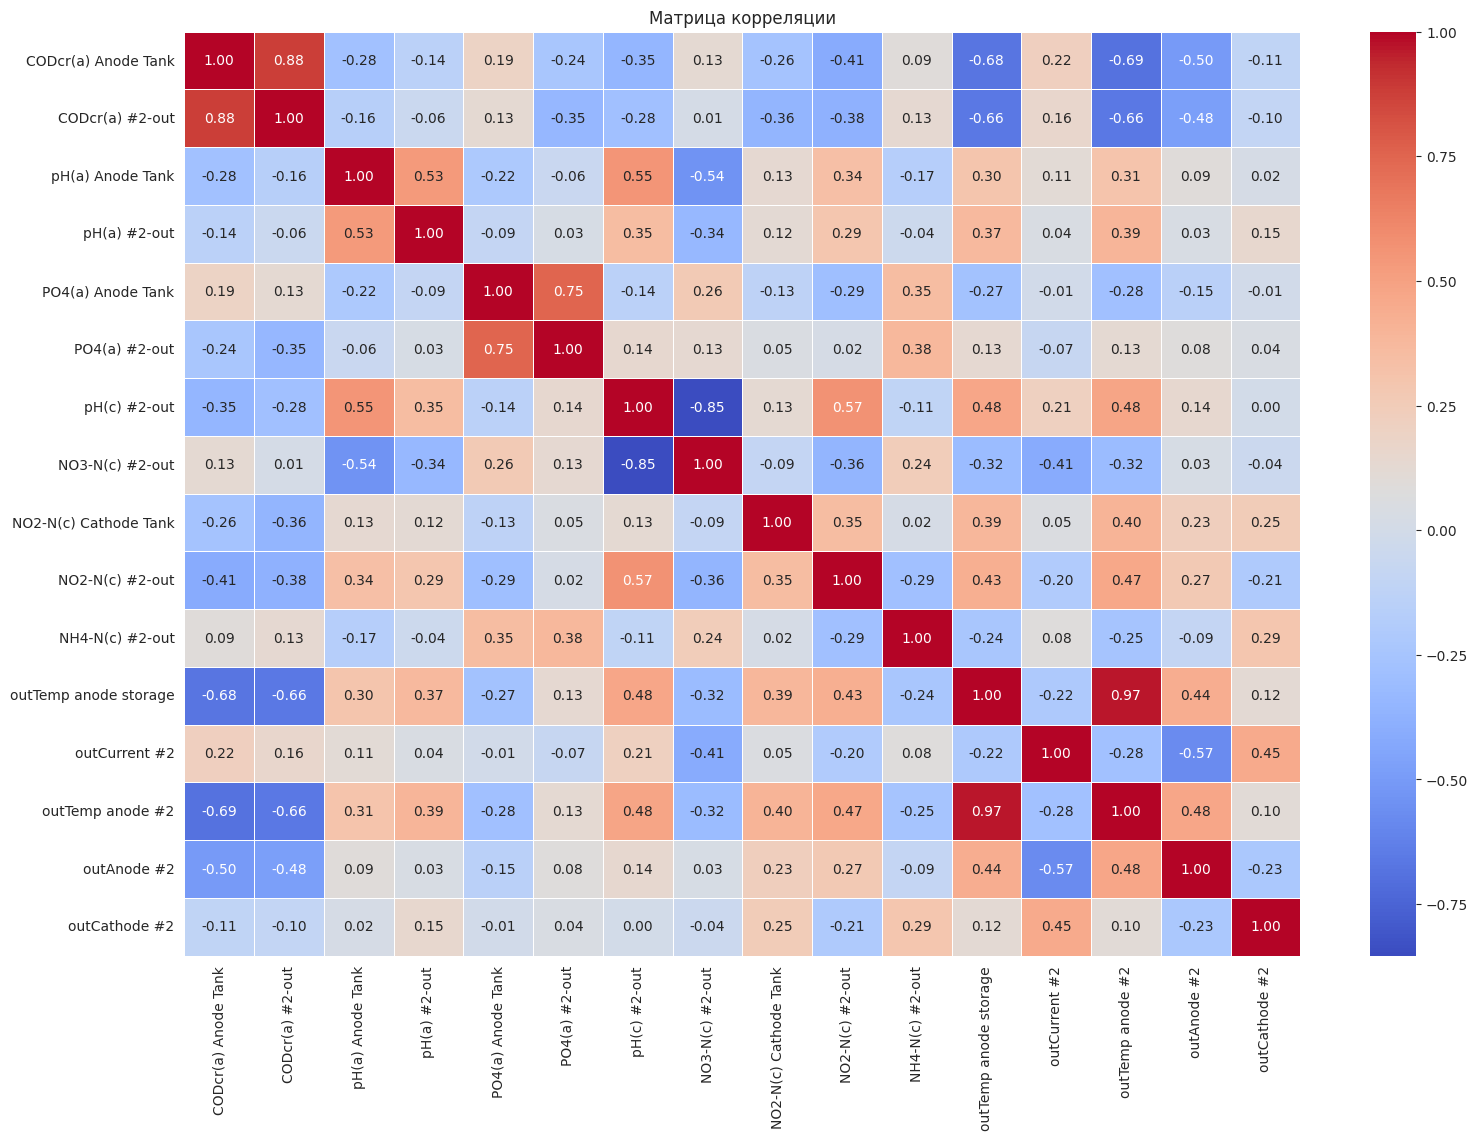

In [ ]:
correlation_matrix = ds111.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

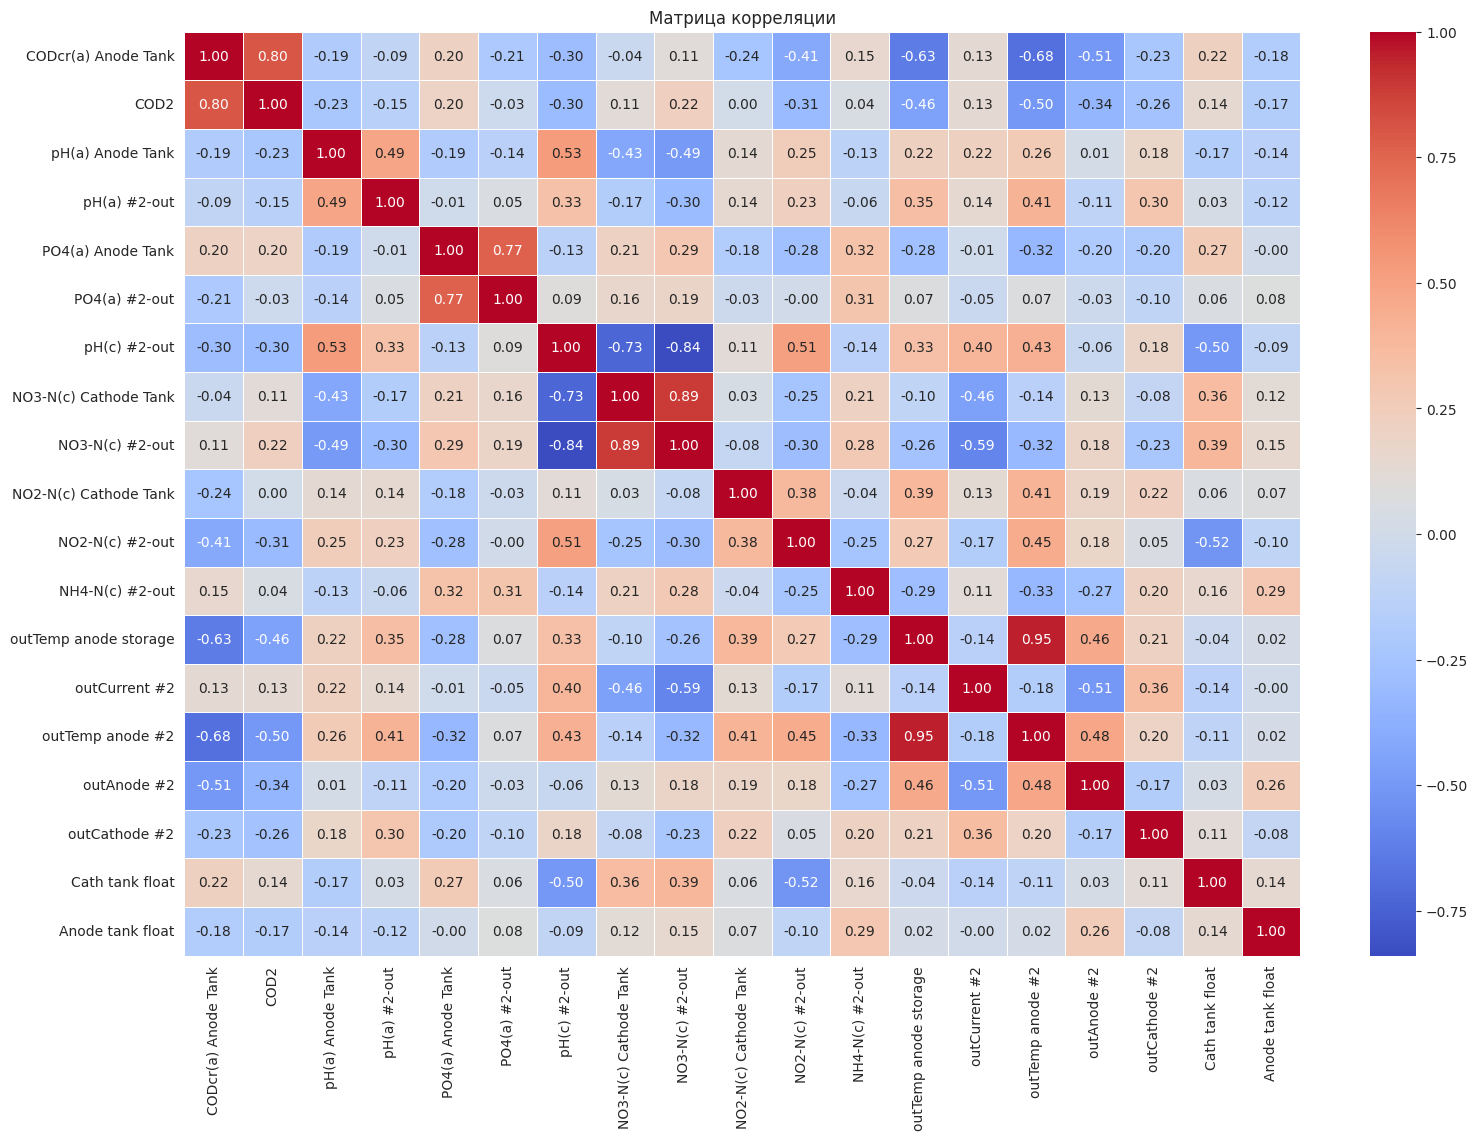

In [ ]:
correlation_matrix = ds111.iloc[::504, :].corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

In [ ]:
ds30['hours_of_day'] = ds30.index.hour
ds30 = pd.get_dummies(ds30, columns=['hours_of_day'], prefix='hour')

In [ ]:
ds30['day_of_week'] = ds30.index.dayofweek
ds30 = pd.get_dummies(ds30, columns=['day_of_week'], prefix='day')

In [ ]:
ds30['month'] = ds30.index.month
ds30 = pd.get_dummies(ds30, columns=['month'], prefix='month')

In [ ]:
ds112 = ds1d[['CODcr(a) Anode Tank']].copy()
ds111 = ds30[['outCurrent #2', 'outTemp anode #2', 'outAnode #2']].copy()

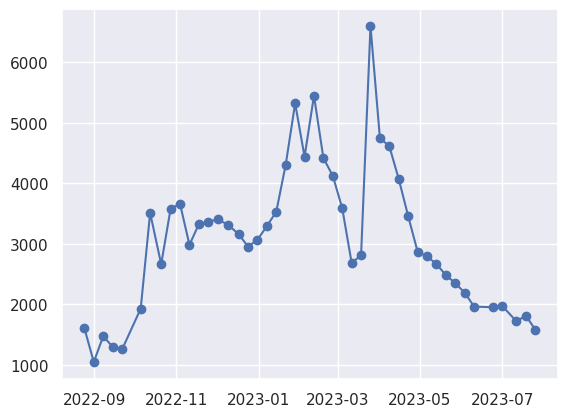

In [ ]:
plt.plot(ds111['CODcr(a) Anode Tank'][::504], marker='o')

In [ ]:
COD removal concentration #2-out

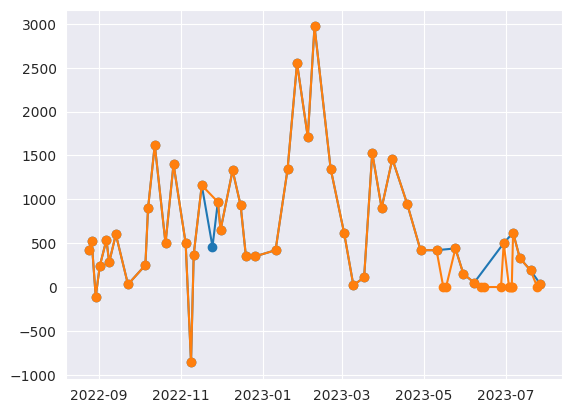

In [ ]:
plt.plot(ds1['CODcr(a) #2-out'].dropna().index, ds1['CODcr(a) Anode Tank'].dropna() - ds1['CODcr(a) #2-out'].dropna(), marker='o')
plt.plot(ds1['COD removal concentration #2-out'].dropna().index, ds1['COD removal concentration #2-out'].dropna(), marker='o')

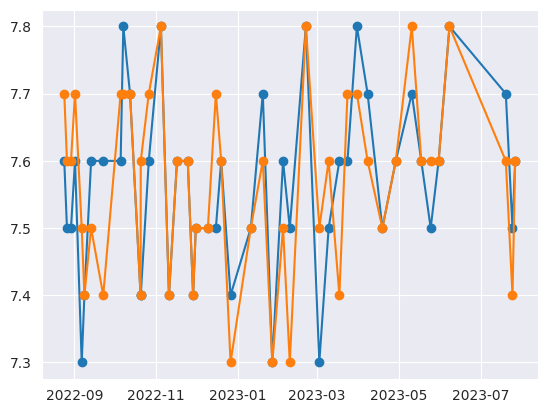

In [ ]:
plt.plot(ds1['pH(a) #1-out'].dropna().index, ds1['pH(a) #1-out'].dropna(), marker='o')
plt.plot(ds1['pH(a) #2-out'].dropna().index, ds1['pH(a) #2-out'].dropna(), marker='o')

In [ ]:
pH(a) Anode Tank    45
pH(a) #2-out    46
CODcr(a) Anode Tank    47
CODcr(a) #2-out    47
CODcr(a)cent Anode Tank    16
CODcr(a)cent #2-out    16
BOD(a) Anode Tank    26
BOD(a) #2-out    26
PO4(a) Anode Tank    42
PO4(a) #2-out    43
pH(c) Cathode Tank    47
pH(c) #2-out    49
NO3-N(c) Cathode Tank    54
NO3-N(c) #2-out    53
PO4-P(c) Cathode Tank    50
PO4-P(c) #2-out    50
NO2-N(c) Cathode Tank    42
NO2-N(c) #2-out    44
NH4-N(c) Cathode Tank    43
NH4-N(c) #1-out    47
NH4-N(c) #2-out    47

In [ ]:
for i in ds1.columns:
  print(i + '    ' + str(ds1[i].dropna().size))

Cathode #1    1992248
Current #1    1992248
Anode #1    1992248
Total V #1    1992248
Temp anode #1    1989718
Cathode #2    1992248
Current #2    1992248
Anode #2    1992248
Total V #2    1992248
Temp anode #2    1992248
Cathode pump #1    1992248
Cathode pump #2    1992248
Anode pump #1    1992248
Anode pump#2    1992248
sludge mixing pump    1992248
Temp anode storage    1992248
Cath tank float    1992248
Anode tank float    1992248
Power    1940617
NO3-N_sensor_Temp    25830
NO3-N_sensor_Storage    24552
NO3-N_sensor_C1_out    25830
NO3-N_sensor_C2_out    18182
BES2 Current    49
pH(a) Anode Tank    45
pH(a) #1-out    46
pH(a) #2-out    46
CODcr(a) Anode Tank    47
CODcr(a) #1-out    47
CODcr(a) #2-out    47
CODcr(a)cent Anode Tank    16
CODcr(a)cent #1-out    16
CODcr(a)cent #2-out    16
BOD(a) Anode Tank    26
BOD(a) #1-out    26
BOD(a) #2-out    26
PO4(a) Anode Tank    42
PO4(a) #1-out    43
PO4(a) #2-out    43
NO2-N(a) #2-out    14
NH4-N(a) #2-out    16
pH(c) Cathode Tank    47

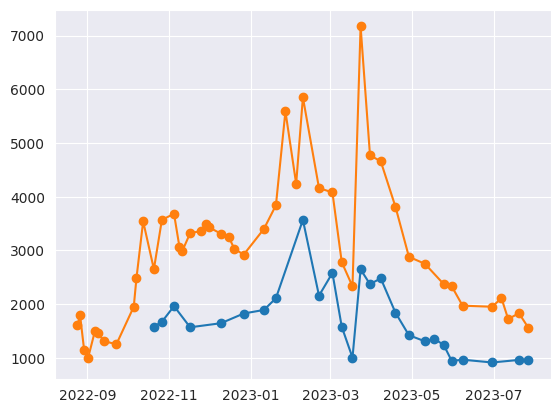

In [ ]:
plt.plot(ds1['BOD(a) Anode Tank'].dropna().index, ds1['BOD(a) Anode Tank'].dropna(), marker='o')
plt.plot(ds1['CODcr(a) Anode Tank'].dropna().index, ds1['CODcr(a) Anode Tank'].dropna(), marker='o')

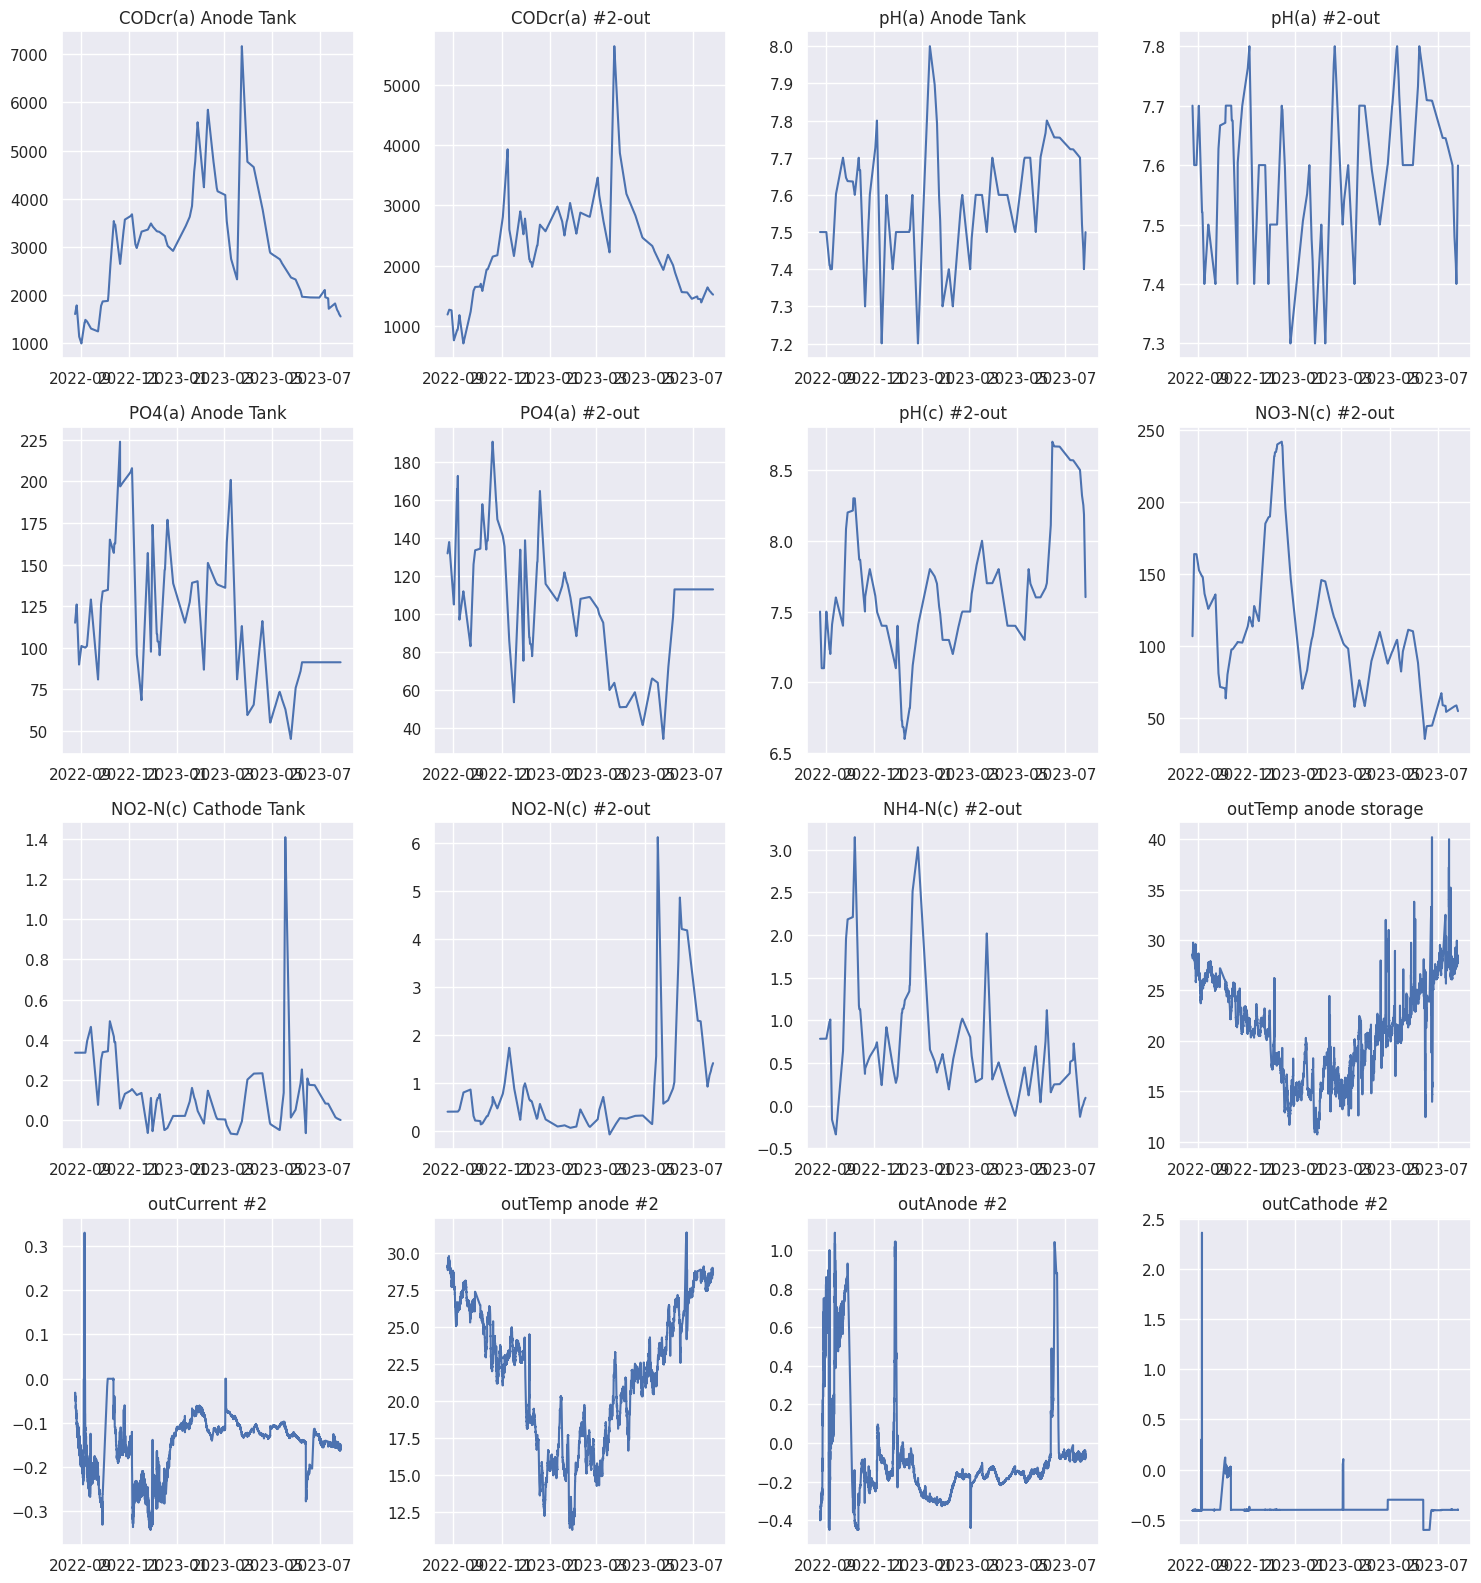

In [ ]:
sns.set()
columns = ds111.columns
num_cols = 4
num_rows = (len(columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)


for i, column in enumerate(columns):
    ax = axes.flat[i] if num_rows > 1 else axes[i]
    ax.plot(ds111[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

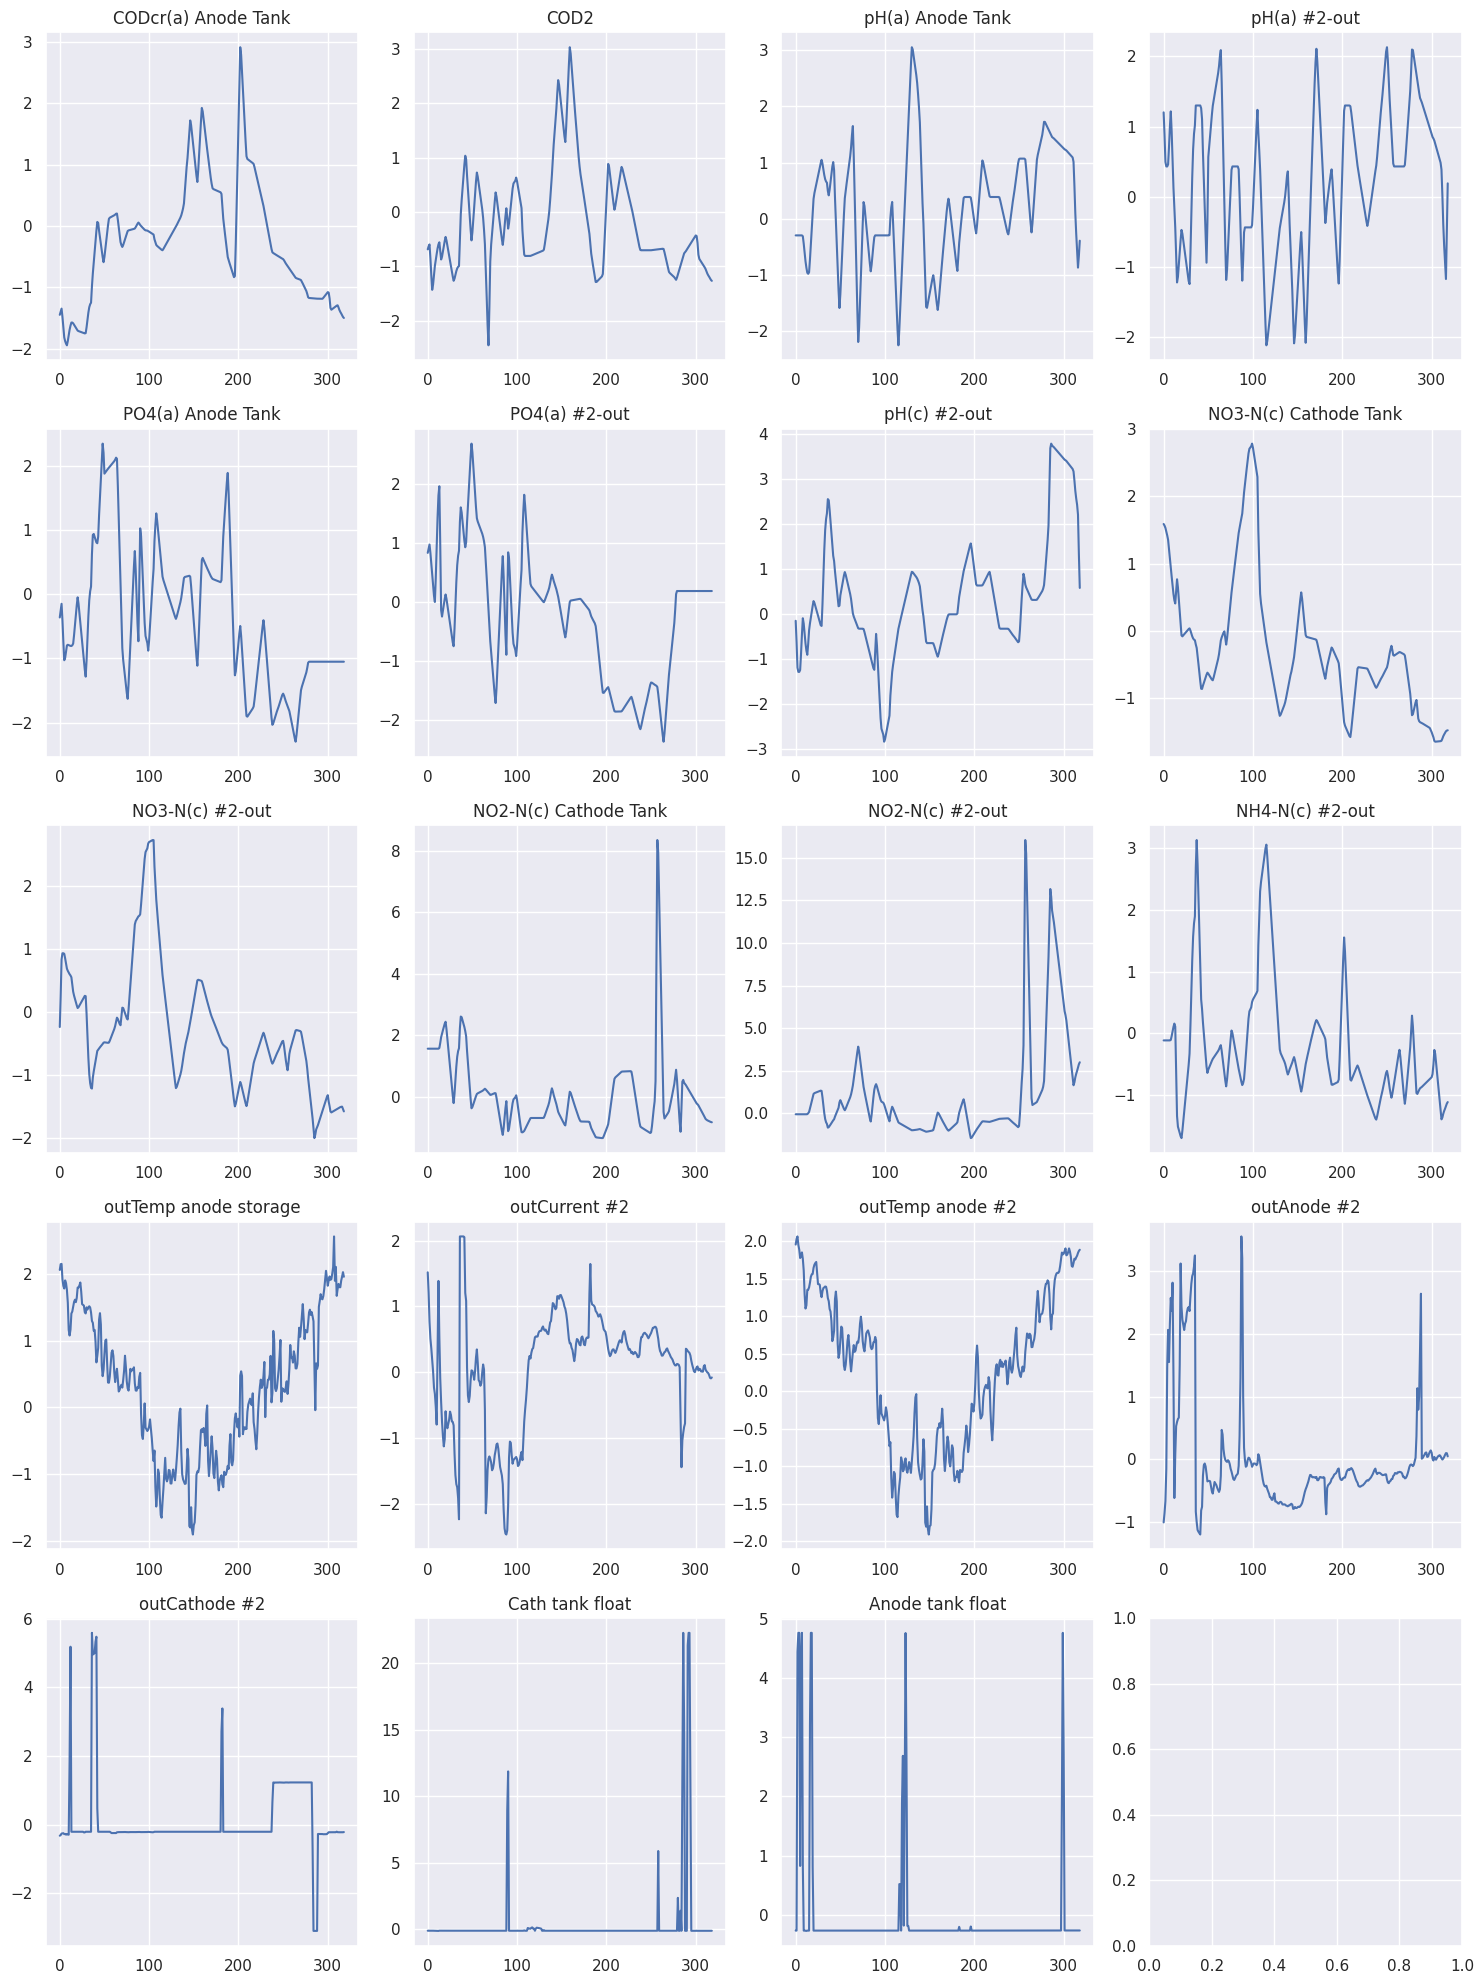

In [ ]:
sns.set()
columns = ds111.columns


num_cols = 4
num_rows = (len(columns) - 1) // num_cols + 1


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns):
    ax = axes.flat[i] if num_rows > 1 else axes[i]
    ax.plot(data2[:, i])
    ax.set_title(column)


plt.tight_layout()
plt.show()

In [ ]:
ds111['CODcr(a) Anode Tank'].shape

(319,)

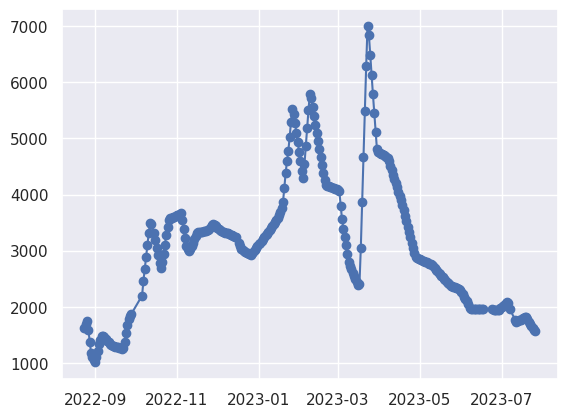

In [ ]:
fig, ax = plt.plot(ds111['CODcr(a) Anode Tank'], marker='o')

In [ ]:
ds1['CODcr(a) Anode Tank'].dropna().size

47

In [ ]:
ds111['CODcr(a) Anode Tank'][::504].size

6

In [ ]:
ds111['CODcr(a) Anode Tank'][::56].size

46

In [ ]:
ds111['CODcr(a) Anode Tank'][0]

1610.0105720662516

In [ ]:
ds111['CODcr(a) Anode Tank'][::504][1]

1050.3414351851852

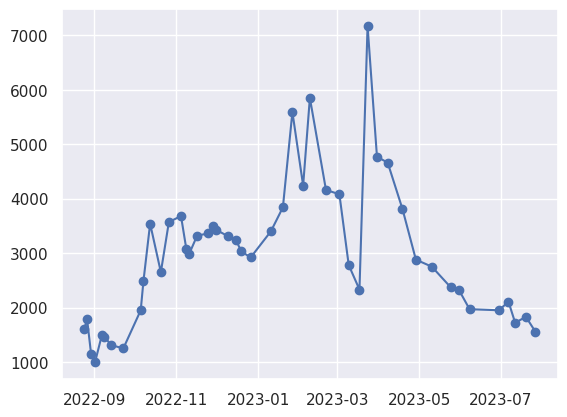

In [ ]:
plt.plot(ds1['CODcr(a) Anode Tank'].dropna(), marker='o')

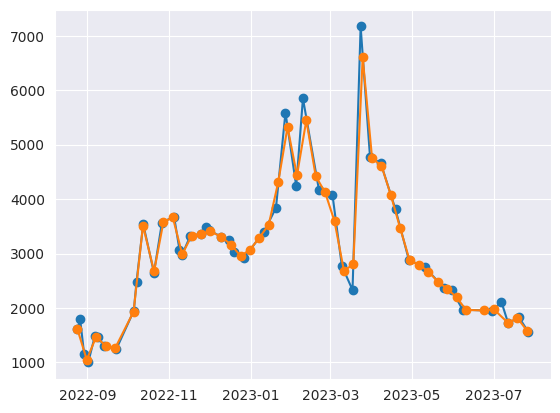

In [ ]:
plt.plot(ds1['CODcr(a) Anode Tank'].dropna(), marker='o')
plt.plot(ds111['CODcr(a) Anode Tank'][::56], marker='o')

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'CODcr(a) #2-out',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'NO3-N(c) #2-out',
       'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2']].copy()

In [ ]:
def data_create(_df):
  return np.stack(_df.values, axis=0)
data1 = data_create(ds111.iloc[::56, :])

In [ ]:
def train_val_test_split(data, train_ratio=0.7, val_ratio=0.2):

    train_size = int(train_ratio * data.shape[0])
    val_size = int(val_ratio * data.shape[0])
    test_size = data.shape[0] - train_size - val_size


    train_data = data[:train_size, :]
    val_data = data[train_size:train_size+val_size, :]
    test_data = data[train_size+val_size:, :]

    return train_data, val_data, test_data


train_data1, val_data1, test_data1 = train_val_test_split(data1)

In [ ]:
scaler = StandardScaler()

train_normalized1 = scaler.fit_transform(train_data1)
val_normalized1 = scaler.transform(val_data1)
test_normalized1 = scaler.transform(test_data1)
data2 = scaler.transform(data1)

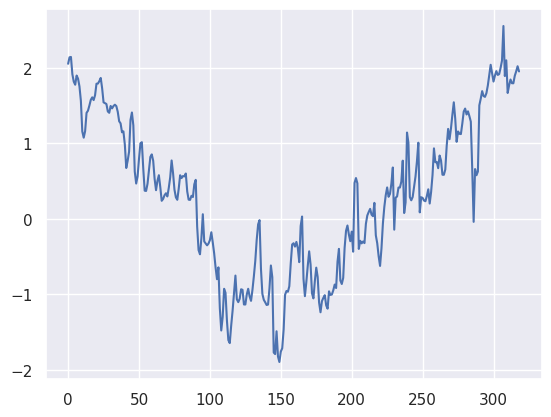

In [ ]:
plt.plot(data2[:, 12])

In [ ]:
scaler = MinMaxScaler()

train_normalized1 = scaler.fit_transform(train_data1)
val_normalized1 = scaler.transform(val_data1)
test_normalized1 = scaler.transform(test_data1)

In [ ]:
train_normalized1.shape

(223, 19)

In [ ]:
val_normalized1.shape

(63, 19)

In [ ]:
test_normalized1.shape

(33, 19)

In [ ]:
del result

In [ ]:
window_size = 7

In [ ]:
test_normalized1[-28:, :].shape

(28, 19)

In [ ]:
val_normalized1 = np.vstack((train_normalized1[-window_size:, :], val_normalized1))
test_normalized1 = np.vstack((val_normalized1[-window_size:, :], test_normalized1))

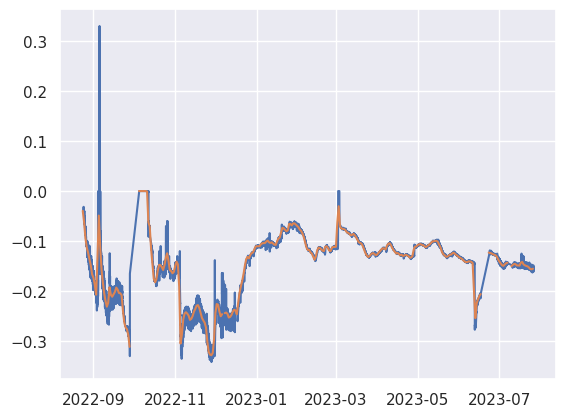

In [ ]:
plt.plot(ds111['outCurrent #2'])
plt.plot(df2['outCurrent #2'].resample('1D').mean())

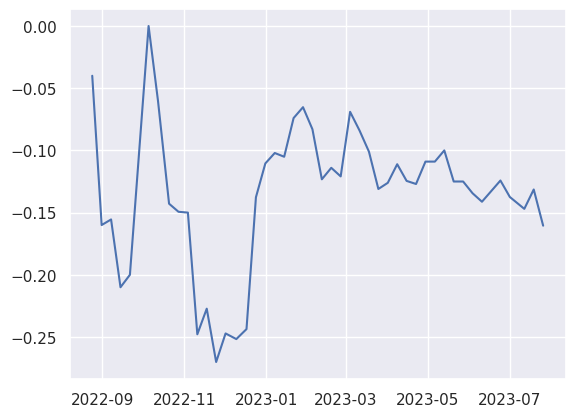

In [ ]:
plt.plot(ds111['outCurrent #2'][::504])

In [ ]:
504/7

72.0

In [ ]:
window_size = 7
forecast_horizon = 1
step = 1
features = 1

def create_sequences(data, window_size, step, forecast_horizon):
    X = []
    y1 = []
    for i in range(0, len(data) - window_size - forecast_horizon + 1, step):
        X.append(data[i:i+window_size, :])
        y_row = []
        for j in range(features):
          y_row.append(data[i+window_size+forecast_horizon - 1, j])
        y1.append(y_row)
    return np.array(X), np.array(y1)

X_train, y_train1 = create_sequences(train_normalized1, window_size, step, forecast_horizon)
X_val, y_val1 = create_sequences(val_normalized1, window_size, step, forecast_horizon)
X_test, y_test1 = create_sequences(test_normalized1, window_size, step, forecast_horizon)

y_train1 = y_train1.reshape(y_train1.shape[0], features)
y_val1 = y_val1.reshape(y_val1.shape[0], features)
y_test1 = y_test1.reshape(y_test1.shape[0], features)

In [ ]:
X_val.shape

(5, 4, 19)

In [ ]:
[1, 2, 3, 4] [5]

In [ ]:
X_val1 = np.vstack((X_train[-1, :, :].reshape(1, window_size, 19), X_val))
X_test1 = np.vstack((X_val[-1, :, :].reshape(1, window_size, 19), X_test))

y_val1 = np.vstack((y_train1.reshape(1, window_size, 19), X_val))
y_test1 = np.vstack((X_val[-1, :, :].reshape(1, window_size, 19), X_test))

In [ ]:
y_train1.shape

(28, 1)

In [ ]:
y_val1.shape

(5, 1)

In [ ]:
X_train.shape

(28, 4, 19)

In [ ]:
X_train[-1, :, :]

array([[0.29483595, 0.        , 0.53770632, 0.49212815, 0.7883592 ,
        0.26637231, 0.7409147 , 0.27067622, 0.16713876, 0.        ,
        0.33809996, 0.16740978, 0.26086894, 0.6889936 , 0.2873124 ,
        0.211     , 0.02631579, 0.        , 0.        ],
       [0.31757703, 0.08357048, 0.52413557, 0.20283091, 0.16038976,
        0.06779723, 0.81761413, 0.20497632, 0.        , 0.00634883,
        0.        , 0.23303371, 0.44076765, 0.62605183, 0.41994942,
        0.21981148, 0.02631579, 0.48834411, 0.        ],
       [1.        , 0.5270341 , 0.46641937, 0.81179357, 0.27069395,
        0.07028098, 0.65616395, 0.        , 0.0686346 , 0.22423618,
        0.1089306 , 0.59678003, 0.58430379, 0.51497812, 0.61184879,
        0.21545902, 0.02631579, 0.63047075, 0.        ],
       [0.6665061 , 0.38281106, 0.64648671, 0.76635981, 0.        ,
        0.        , 0.6682095 , 0.01151665, 0.02666141, 0.56293307,
        0.18031201, 0.18738885, 0.44610734, 0.53325154, 0.45990637,
        0.251

In [ ]:
X_val.shape

(5, 4, 19)

In [ ]:
X_test.shape

(1, 4, 19)

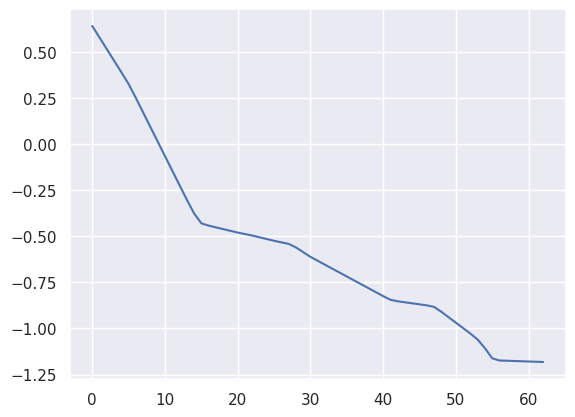

In [ ]:
plt.plot(val_normalized1[:, 0][28:])

In [ ]:
ds1['CODcr(a) Anode Tank'].dropna()

timestamp
2022-08-24 13:19:38    1610.0
2022-08-26 13:19:49    1790.0
2022-08-29 13:19:49    1150.0
2022-09-01 13:19:49    1000.0
2022-09-06 13:19:41    1490.0
2022-09-08 13:19:41    1460.0
2022-09-13 13:19:34    1310.0
2022-09-22 14:17:31    1250.0
2022-10-05 13:19:44    1950.0
2022-10-07 13:19:39    2480.0
2022-10-12 13:19:44    3540.0
2022-10-20 13:17:34    2650.0
2022-10-26 12:45:32    3570.0
2022-11-04 13:35:33    3680.0
2022-11-08 13:35:39    3070.0
2022-11-10 13:35:30    2980.0
2022-11-16 13:35:30    3320.0
2022-11-24 13:35:34    3360.0
2022-11-28 13:35:44    3490.0
2022-11-30 13:35:40    3430.0
2022-12-09 13:35:33    3310.0
2022-12-15 12:35:33    3240.0
2022-12-19 11:21:32    3030.0
2022-12-26 11:21:36    2920.0
2023-01-10 13:21:34    3400.0
2023-01-19 11:47:46    3840.0
2023-01-26 13:47:31    5590.0
2023-02-03 13:47:31    4240.0
2023-02-08 14:10:31    5850.0
2023-02-20 14:10:30    4160.0
2023-03-02 14:10:31    4080.0
2023-03-09 13:10:31    2780.0
2023-03-17 13:10:37    2330.0


In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]))
lstm1 = LSTM(32, return_sequences=True)(input_layer)
drop1 = Dropout(0.25)(lstm1)
lstm2 = LSTM(16, return_sequences=True)(drop1)
drop2 = Dropout(0.25)(lstm2)
lstm3 = LSTM(16, return_sequences=True)(drop2)
drop3 = Dropout(0.25)(lstm3)
lstm4 = LSTM(8)(drop2)
drop4 = Dropout(0.25)(lstm4)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop4))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=1, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
25/25 - 6s - loss: 0.1893 - mae: 0.3938 - mape: 77.8696 - val_loss: 0.0170 - val_mae: 0.0896 - val_mape: 23.7161 - 6s/epoch - 257ms/step
Epoch 2/500
25/25 - 0s - loss: 0.0565 - mae: 0.1824 - mape: 32.9873 - val_loss: 0.0323 - val_mae: 0.1655 - val_mape: 67.7619 - 289ms/epoch - 12ms/step
Epoch 3/500
25/25 - 0s - loss: 0.0465 - mae: 0.1685 - mape: 33.6433 - val_loss: 0.0547 - val_mae: 0.2145 - val_mape: 87.8794 - 244ms/epoch - 10ms/step
Epoch 4/500
25/25 - 0s - loss: 0.0382 - mae: 0.1572 - mape: 34.7225 - val_loss: 0.0303 - val_mae: 0.1613 - val_mape: 65.6190 - 253ms/epoch - 10ms/step
Epoch 5/500
25/25 - 0s - loss: 0.0440 - mae: 0.1589 - mape: 29.4408 - val_loss: 0.0385 - val_mae: 0.1816 - val_mape: 73.7779 - 260ms/epoch - 10ms/step
Epoch 6/500
25/25 - 0s - loss: 0.0308 - mae: 0.1383 - mape: 28.0482 - val_loss: 0.0415 - val_mae: 0.1881 - val_mape: 76.3219 - 282ms/epoch - 11ms/step
Epoch 7/500
25/25 - 0s - loss: 0.0317 - mae: 0.1358 - mape: 28.6601 - val_loss: 0.0335 - val_mae

KeyboardInterrupt: 

In [ ]:
from keras.layers import Input, Dense, LSTM, Bidirectional, Concatenate, Attention

In [ ]:
del ds1
del result

In [ ]:
del ds1
del xv
del x

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]))
lstm1 = LSTM(100, return_sequences=True)(input_layer)
drop1 = Dropout(0.1)(lstm1)
lstm2 = LSTM(100, return_sequences=True)(drop1)
drop2 = Dropout(0.1)(lstm2)
lstm3 = LSTM(50)(drop2)
drop3 = Dropout(0.2)(lstm3)
# lstm4 = LSTM(50, return_sequences=True)(drop3)
# drop4 = Dropout(0.2)(lstm4)
# lstm5 = LSTM(50)(drop4)
# drop5 = Dropout(0.2)(lstm5)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop3))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=1, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
221/221 - 7s - loss: 0.2791 - mae: 0.3528 - mape: 274.6501 - val_loss: 0.7187 - val_mae: 0.7996 - val_mape: 76.0024 - 7s/epoch - 34ms/step
Epoch 2/500
221/221 - 2s - loss: 0.1705 - mae: 0.2549 - mape: 156.9471 - val_loss: 1.0202 - val_mae: 0.9394 - val_mape: 88.8152 - 2s/epoch - 8ms/step
Epoch 3/500
221/221 - 2s - loss: 0.1048 - mae: 0.2232 - mape: 150.1863 - val_loss: 1.7425 - val_mae: 1.2533 - val_mape: 119.8018 - 2s/epoch - 8ms/step
Epoch 4/500
221/221 - 2s - loss: 0.0878 - mae: 0.1903 - mape: 114.0670 - val_loss: 0.7505 - val_mae: 0.7940 - val_mape: 74.3552 - 2s/epoch - 8ms/step
Epoch 5/500
221/221 - 2s - loss: 0.0586 - mae: 0.1645 - mape: 94.9538 - val_loss: 0.7557 - val_mae: 0.7181 - val_mape: 65.0561 - 2s/epoch - 8ms/step
Epoch 6/500
221/221 - 2s - loss: 0.0877 - mae: 0.1772 - mape: 118.0134 - val_loss: 1.1811 - val_mae: 0.9517 - val_mape: 88.0816 - 2s/epoch - 9ms/step
Epoch 7/500
221/221 - 2s - loss: 0.0441 - mae: 0.1309 - mape: 107.9632 - val_loss: 1.1397 - val_mae

KeyboardInterrupt: 

In [ ]:
y_train1[:, 0].shape

(28,)

In [ ]:
X_train.shape

(28, 4, 19)

In [ ]:
model.predict(X_train).shape

1/1 [==============================] - 0s 107ms/step


(28, 4, 1)

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1_l2
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)
l = 0.001
input_layer = Input(shape=(window_size, data1.shape[1]))
lstm1 = LSTM(100,  kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(input_layer)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(100, kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(repeat)
drop2 = Dropout(0.5)(lstm2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear',  name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=4, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
7/7 - 6s - loss: 6.4357 - mae: 0.3342 - mape: 63.1477 - val_loss: 6.0901 - val_mae: 0.2070 - val_mape: 86.0396 - 6s/epoch - 842ms/step
Epoch 2/500
7/7 - 0s - loss: 5.9630 - mae: 0.2108 - mape: 48.4889 - val_loss: 5.7845 - val_mae: 0.3248 - val_mape: 128.7657 - 146ms/epoch - 21ms/step
Epoch 3/500
7/7 - 0s - loss: 5.5789 - mae: 0.1798 - mape: 39.8967 - val_loss: 5.3666 - val_mae: 0.2125 - val_mape: 87.5567 - 128ms/epoch - 18ms/step
Epoch 4/500
7/7 - 0s - loss: 5.2058 - mae: 0.1188 - mape: 24.5357 - val_loss: 4.9936 - val_mae: 0.1358 - val_mape: 56.0330 - 128ms/epoch - 18ms/step
Epoch 5/500
7/7 - 0s - loss: 4.8922 - mae: 0.1499 - mape: 27.0017 - val_loss: 4.6850 - val_mae: 0.1801 - val_mape: 74.4154 - 117ms/epoch - 17ms/step
Epoch 6/500
7/7 - 0s - loss: 4.5608 - mae: 0.1390 - mape: 28.4184 - val_loss: 4.3828 - val_mae: 0.1976 - val_mape: 80.9904 - 118ms/epoch - 17ms/step
Epoch 7/500
7/7 - 0s - loss: 4.2631 - mae: 0.1456 - mape: 28.4247 - val_loss: 4.0859 - val_mae: 0.1918 - va

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]))
lstm1 = LSTM(100, return_sequences=True,  kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(input_layer)
drop1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(50, return_sequences=True,  kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(drop1)
drop2 = Dropout(0.5)(lstm2)
# lstm3 = LSTM(50,  kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(drop2)
# drop3 = Dropout(0.2)(lstm3)
# lstm4 = LSTM(50, return_sequences=True)(drop3)
# drop4 = Dropout(0.2)(lstm4)
# lstm5 = LSTM(50)(drop4)
# drop5 = Dropout(0.2)(lstm5)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=4, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
7/7 - 6s - loss: 4.5871 - mae: 0.4666 - mape: 92.8044 - val_loss: 4.2224 - val_mae: 0.1611 - val_mape: 48.5786 - 6s/epoch - 872ms/step
Epoch 2/500
7/7 - 0s - loss: 4.2208 - mae: 0.3001 - mape: 57.0425 - val_loss: 3.9843 - val_mae: 0.1707 - val_mape: 61.2746 - 161ms/epoch - 23ms/step
Epoch 3/500
7/7 - 0s - loss: 3.9494 - mae: 0.2509 - mape: 49.2013 - val_loss: 3.7847 - val_mae: 0.2284 - val_mape: 85.7282 - 154ms/epoch - 22ms/step
Epoch 4/500
7/7 - 0s - loss: 3.7151 - mae: 0.2445 - mape: 50.1032 - val_loss: 3.5631 - val_mae: 0.2340 - val_mape: 88.3164 - 176ms/epoch - 25ms/step
Epoch 5/500
7/7 - 0s - loss: 3.4936 - mae: 0.2426 - mape: 48.8406 - val_loss: 3.3349 - val_mae: 0.2135 - val_mape: 80.4853 - 147ms/epoch - 21ms/step
Epoch 6/500
7/7 - 0s - loss: 3.2721 - mae: 0.2244 - mape: 44.8415 - val_loss: 3.1193 - val_mae: 0.1939 - val_mape: 72.7941 - 157ms/epoch - 22ms/step
Epoch 7/500
7/7 - 0s - loss: 3.0751 - mae: 0.2259 - mape: 43.8071 - val_loss: 2.9189 - val_mae: 0.1801 - val

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'COD2',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out',  'pH(c) #2-out',
       'NO3-N(c) Cathode Tank',
       'NO3-N(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out',
       'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'CODcr(a) #2-out', 'BOD(a) Anode Tank', 'BOD(a) #2-out',
       'pH(a) Anode Tank',  'pH(a) #2-out',
       'PO4(a) Anode Tank',  'PO4(a) #2-out', 'PO4-P(c) Cathode Tank',
'PO4-P(c) #2-out', 'pH(c) Cathode Tank', 'pH(c) #2-out',
       'NO3-N(c) Cathode Tank',
       'NO3-N(c) #2-out', 'NO2-N(c) Cathode Tank',
       'NO2-N(c) #2-out',
       'NH4-N(c) Cathode Tank', 'NH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2']].copy()

In [ ]:
def data_create(_df):
  return np.stack(_df.values, axis=0)
data1 = data_create(ds111[::56])

In [ ]:
def train_val_test_split(data, train_ratio=0.7, val_ratio=0.2):

    train_size = int(train_ratio * data.shape[0])
    val_size = int(val_ratio * data.shape[0])
    test_size = data.shape[0] - train_size - val_size


    train_data = data[:train_size, :]
    val_data = data[train_size:train_size+val_size, :]
    test_data = data[train_size+val_size:, :]

    return train_data, val_data, test_data

train_data1, val_data1, test_data1 = train_val_test_split(data1)

In [ ]:
scaler = MinMaxScaler()

train_normalized1 = scaler.fit_transform(train_data1)
val_normalized1 = scaler.transform(val_data1)
test_normalized1 = scaler.transform(test_data1)

In [ ]:
window_size = 6
val_normalized1 = np.vstack((train_normalized1[-window_size:, :], val_normalized1))
test_normalized1 = np.vstack((val_normalized1[-window_size:, :], test_normalized1))

In [ ]:
forecast_horizon = 1
step = 1
features = 1

def create_sequences(data, window_size, step, forecast_horizon):
    X = []
    y1 = []
    for i in range(0, len(data) - window_size - forecast_horizon + 1, step):
        X.append(data[i:i+window_size, :])
        y_row = []
        for j in range(features):
          y_row.append(data[i+window_size+forecast_horizon - 1, j])
        y1.append(y_row)
    return np.array(X), np.array(y1)

X_train, y_train1 = create_sequences(train_normalized1, window_size, step, forecast_horizon)
X_val, y_val1 = create_sequences(val_normalized1, window_size, step, forecast_horizon)
X_test, y_test1 = create_sequences(test_normalized1, window_size, step, forecast_horizon)

y_train1 = y_train1.reshape(y_train1.shape[0], features)
y_val1 = y_val1.reshape(y_val1.shape[0], features)
y_test1 = y_test1.reshape(y_test1.shape[0], features)

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1_l2
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

input_layer = Input(shape=(window_size, data1.shape[1]))
lstm1 = LSTM(25)(input_layer)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(25)(repeat)
drop2 = Dropout(0.3)(lstm2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear',  name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=1, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/100
25/25 - 5s - loss: 0.1515 - mae: 0.3230 - mape: 61.8001 - val_loss: 0.0341 - val_mae: 0.1664 - val_mape: 69.9131 - 5s/epoch - 185ms/step
Epoch 2/100
25/25 - 0s - loss: 0.0342 - mae: 0.1359 - mape: 27.2513 - val_loss: 0.0609 - val_mae: 0.2286 - val_mape: 93.7644 - 218ms/epoch - 9ms/step
Epoch 3/100
25/25 - 0s - loss: 0.0358 - mae: 0.1513 - mape: 32.6232 - val_loss: 0.0351 - val_mae: 0.1705 - val_mape: 71.0024 - 208ms/epoch - 8ms/step
Epoch 4/100
25/25 - 0s - loss: 0.0287 - mae: 0.1323 - mape: 28.1971 - val_loss: 0.0410 - val_mae: 0.1865 - val_mape: 76.6635 - 252ms/epoch - 10ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0314 - mae: 0.1408 - mape: 30.3232 - val_loss: 0.0551 - val_mae: 0.2236 - val_mape: 89.2618 - 210ms/epoch - 8ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0317 - mae: 0.1280 - mape: 25.1666 - val_loss: 0.0469 - val_mae: 0.2073 - val_mape: 82.1571 - 235ms/epoch - 9ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0284 - mae: 0.1299 - mape: 27.2125 - val_loss: 0.0567 - val_mae: 0.

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1_l2
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)
l = 0.001
input_layer = Input(shape=(window_size, data1.shape[1]))
lstm1 = LSTM(50)(input_layer)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(50, kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(repeat)
drop2 = Dropout(0.2)(lstm2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear',  name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=2, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
111/111 - 6s - loss: 1.1995 - mae: 0.1280 - mape: 30.6015 - val_loss: 0.8289 - val_mae: 0.0958 - val_mape: 52.0203 - 6s/epoch - 53ms/step
Epoch 2/500
111/111 - 1s - loss: 0.6088 - mae: 0.0985 - mape: 24.0732 - val_loss: 0.4179 - val_mae: 0.0616 - val_mape: 29.8643 - 801ms/epoch - 7ms/step
Epoch 3/500
111/111 - 1s - loss: 0.3287 - mae: 0.0930 - mape: 23.5749 - val_loss: 0.2494 - val_mae: 0.0498 - val_mape: 27.8598 - 768ms/epoch - 7ms/step
Epoch 4/500
111/111 - 1s - loss: 0.2261 - mae: 0.0765 - mape: 18.4740 - val_loss: 0.1919 - val_mae: 0.0408 - val_mape: 23.8276 - 769ms/epoch - 7ms/step
Epoch 5/500
111/111 - 1s - loss: 0.1798 - mae: 0.0737 - mape: 17.6236 - val_loss: 0.1575 - val_mae: 0.0576 - val_mape: 28.8004 - 781ms/epoch - 7ms/step
Epoch 6/500
111/111 - 1s - loss: 0.1469 - mae: 0.0623 - mape: 14.9504 - val_loss: 0.1339 - val_mae: 0.0681 - val_mape: 32.3014 - 754ms/epoch - 7ms/step
Epoch 7/500
111/111 - 1s - loss: 0.1246 - mae: 0.0659 - mape: 15.7980 - val_loss: 0.1112 -

1/1 [==============================] - 0s 23ms/step


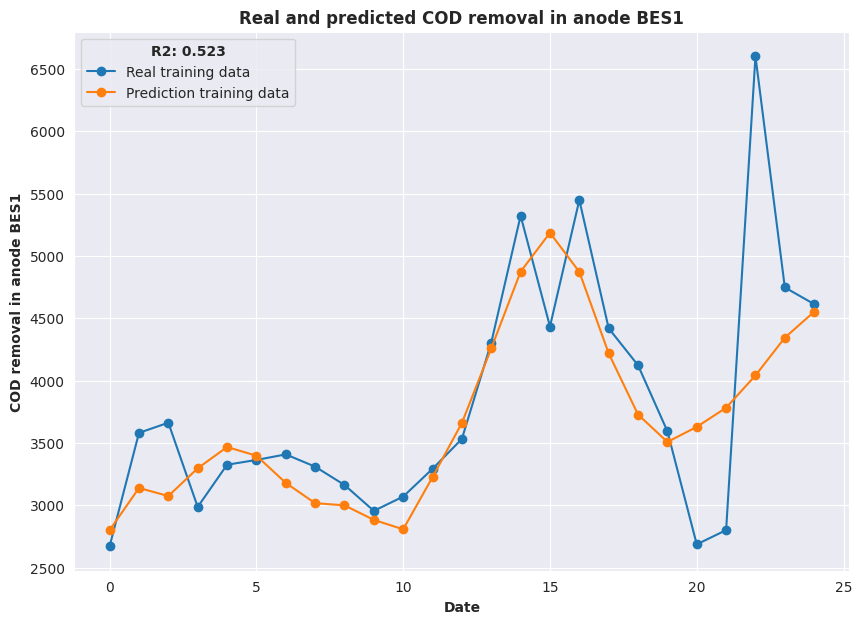

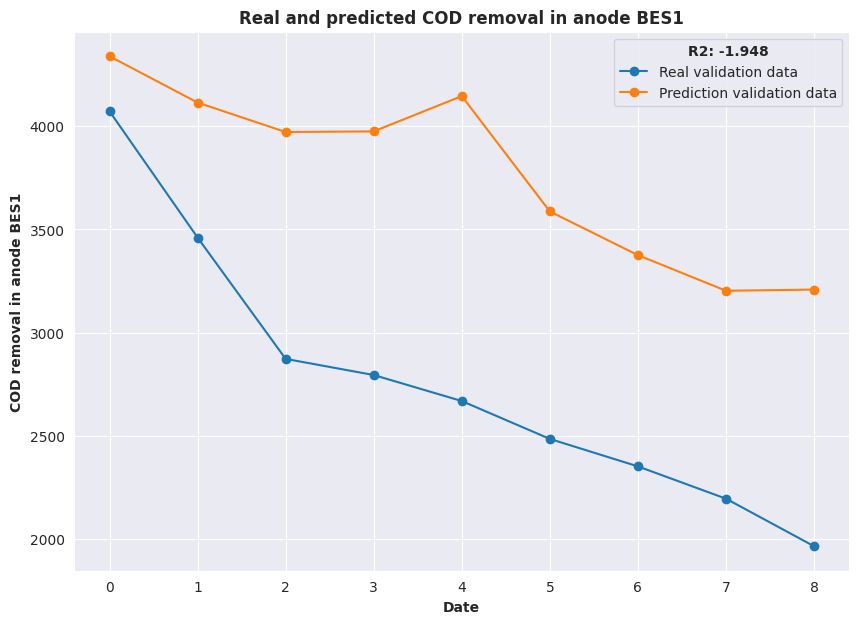

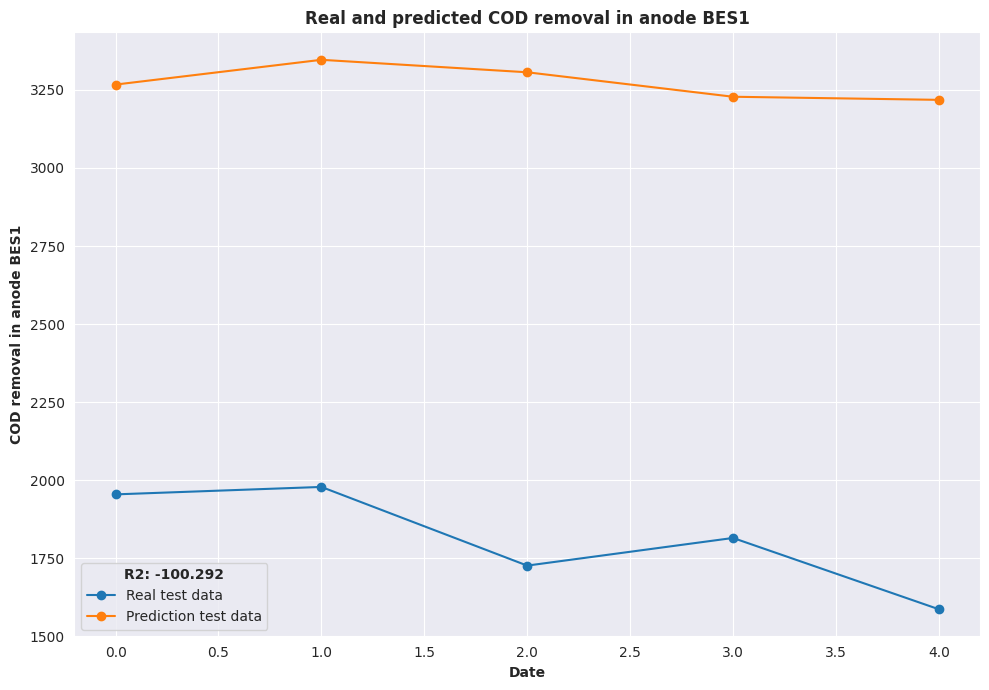

Mean Absolute Error (MAE) Train: 412.5101061448942
Max Error Train: 2560.7858237652827
MAPE Train: 0.10340285978252105
Root Mean Squared Error (RMSE) Train: 657.7358763659045
Mean Squared Error (MSE) Train: 432616.4830588244
Mean Absolute Error (MAE) Val: 1005.885866259654
Max Error Val: 1477.2782830979386
MAPE Val: 0.39802794960605514
Root Mean Squared Error (RMSE): 1059.5442498564894
Mean Squared Error (MSE): 1122634.0174039507
Mean Absolute Error (MAE) Test: 1460.9378652321197
Max Error Test: 1631.3812723595972
MAPE Test: 0.8169508419847753
Root Mean Squared Error (RMSE): 1466.145129665213
Mean Squared Error (MSE): 2149581.5412410246


In [ ]:
def pred_plot(_y_train, _y_val, _y_test, output_index, number, model, col):
  pred_train = model.predict(X_train) * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  pred_val = model.predict(X_val) * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  # X_test =  X_val
  # y_test = pred_val
  pred_test = model.predict(X_test) * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]

  pred_train = pred_train.flatten()
  pred_val = pred_val.flatten()
  pred_test = pred_test.flatten()

  y_train = _y_train * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  y_val = _y_val * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  y_test = _y_test * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  # pred_test = y_test
  # Среднее значение predictions по измерению axis 0
  plt.figure(figsize=(10, 7))

  # График для pred_train

  plt.plot(  y_train, marker='o', label='Real training data')
  plt.plot( pred_train, marker='o', label='Prediction training data')
  #plt.plot(ds30['CODcr(a) Anode Tank'][a[0]][window_size+forecast_horizon - 1:tr],  ds30['CODcr(a) Anode Tank'][a[0]][window_size+forecast_horizon - 1:tr], marker='o', color='red', label='Real training data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_train , pred_train):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  # График для pred_val
  plt.figure(figsize=(10, 7))
  plt.plot( y_val, marker='o', label='Real validation data')
  plt.plot( pred_val, marker='o', label='Prediction validation data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_val , pred_val):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  # График для pred_test
  plt.figure(figsize=(10, 7))
  plt.plot(y_test, marker='o', label='Real test data')
  plt.plot(pred_test, marker='o', label='Prediction test data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_test, pred_test):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  plt.tight_layout()
  plt.show()

  mae = mean_absolute_error(y_train, pred_train)
  maxae = max_error(y_train, pred_train)
  mape= mean_absolute_percentage_error(y_train, pred_train)
  rmse = np.sqrt(mean_squared_error(y_train, pred_train))
  mse = mean_squared_error(y_train, pred_train)

  print("Mean Absolute Error (MAE) Train:", mae)
  print("Max Error Train:", maxae)
  print("MAPE Train:", mape)
  print("Root Mean Squared Error (RMSE) Train:", rmse)
  print("Mean Squared Error (MSE) Train:", mse)

  mae = mean_absolute_error(y_val , pred_val)
  maxae = max_error(y_val , pred_val)
  mape= mean_absolute_percentage_error(y_val, pred_val)
  rmse = np.sqrt(mean_squared_error(y_val , pred_val))
  mse = mean_squared_error(y_val, pred_val)

  print("Mean Absolute Error (MAE) Val:", mae)
  print("Max Error Val:", maxae)
  print("MAPE Val:", mape)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Squared Error (MSE):", mse)

  mae = mean_absolute_error(y_test, pred_test)
  maxae = max_error(y_test, pred_test)
  mape= mean_absolute_percentage_error(y_test, pred_test)
  rmse = np.sqrt(mean_squared_error(y_test, pred_test))
  mse = mean_squared_error(y_test, pred_test)

  print("Mean Absolute Error (MAE) Test:", mae)
  print("Max Error Test:", maxae)
  print("MAPE Test:", mape)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Squared Error (MSE):", mse)

for i in range(features):
  if i == 0:
    pred_plot(y_train1[:, i], y_val1[:, i], y_test1[:, i], i, i, model, 'COD removal in anode BES1')
  if i == 1:
    pred_plot(y_train1[:, i], y_val1[:, i], y_test1[:, i], i, i, model, 'COD in anode tank')

In [ ]:
from keras.layers import Flatten

In [ ]:
data1.shape[1]

16

In [ ]:
(window_size, data1.shape[1])

(6, 23)

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1_l2
l = 0.0005
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

input_layer = Input(shape=(window_size, data1.shape[1]))
lstm1 = LSTM(64, return_sequences=True, activation='relu')(input_layer)
drop1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(32, return_sequences=True, activation='relu')(drop1)
drop2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(16, activation='relu')(drop2)
drop3 = Dropout(0.2)(lstm3)

outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear',  name='output{}'.format(i))(drop3))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=200, batch_size=1, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/200
26/26 - 7s - loss: 0.2056 - mae: 0.3908 - mape: 69.2664 - val_loss: 0.0170 - val_mae: 0.1082 - val_mape: 40.8662 - 7s/epoch - 264ms/step
Epoch 2/200
26/26 - 0s - loss: 0.0816 - mae: 0.2365 - mape: 43.9969 - val_loss: 0.0217 - val_mae: 0.1193 - val_mape: 53.8382 - 463ms/epoch - 18ms/step
Epoch 3/200
26/26 - 0s - loss: 0.0535 - mae: 0.1825 - mape: 31.9178 - val_loss: 0.0256 - val_mae: 0.1408 - val_mape: 62.4575 - 436ms/epoch - 17ms/step
Epoch 4/200
26/26 - 0s - loss: 0.0565 - mae: 0.1936 - mape: 38.4913 - val_loss: 0.0178 - val_mae: 0.1198 - val_mape: 52.3444 - 439ms/epoch - 17ms/step
Epoch 5/200
26/26 - 0s - loss: 0.0383 - mae: 0.1433 - mape: 28.8214 - val_loss: 0.0139 - val_mae: 0.1087 - val_mape: 46.6075 - 436ms/epoch - 17ms/step
Epoch 6/200
26/26 - 0s - loss: 0.0310 - mae: 0.1398 - mape: 30.1363 - val_loss: 0.0059 - val_mae: 0.0642 - val_mape: 27.5625 - 423ms/epoch - 16ms/step
Epoch 7/200
26/26 - 1s - loss: 0.0280 - mae: 0.1189 - mape: 24.8007 - val_loss: 0.0106 - val_mae

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1_l2
l = 0.0005
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

input_layer = Input(shape=(window_size, data1.shape[1]))
conv1d = Conv1D(50, 4, activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.3)(conv1d)
max1 = MaxPooling1D(2)(drop1)
# ar = tf.keras.layers.Reshape((2, 64))
lstm1 = LSTM(50, activation='relu')(max1)
#lstm1 = LSTM(50, activation='relu')(drop1)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(50, activation='relu')(repeat)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear',  name='output{}'.format(i))(lstm2))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=200, batch_size=1, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

TypeError: 'KerasTensor' object is not callable

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1_l2
l = 0.0005
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

input_layer = Input(shape=(window_size, data1.shape[1]))
lstm1 = LSTM(32, return_sequences=True, activation='relu')(input_layer)
drop1 = Dropout(0.3)(lstm1)
lstm2 = LSTM(16, activation='relu')(drop1)
drop2 = Dropout(0.3)(lstm2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear',  name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=1, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
26/26 - 7s - loss: 0.2062 - mae: 0.3869 - mape: 68.3721 - val_loss: 0.0176 - val_mae: 0.1106 - val_mape: 40.3809 - 7s/epoch - 270ms/step
Epoch 2/500
26/26 - 0s - loss: 0.1356 - mae: 0.2897 - mape: 49.3087 - val_loss: 0.0202 - val_mae: 0.1125 - val_mape: 49.6854 - 199ms/epoch - 8ms/step
Epoch 3/500
26/26 - 0s - loss: 0.0734 - mae: 0.2199 - mape: 39.9712 - val_loss: 0.0210 - val_mae: 0.1183 - val_mape: 53.1247 - 239ms/epoch - 9ms/step
Epoch 4/500
26/26 - 0s - loss: 0.0915 - mae: 0.2411 - mape: 44.6529 - val_loss: 0.0150 - val_mae: 0.0995 - val_mape: 44.2870 - 207ms/epoch - 8ms/step
Epoch 5/500
26/26 - 0s - loss: 0.0639 - mae: 0.2117 - mape: 38.7706 - val_loss: 0.0310 - val_mae: 0.1568 - val_mape: 69.1577 - 197ms/epoch - 8ms/step
Epoch 6/500
26/26 - 0s - loss: 0.0597 - mae: 0.2007 - mape: 38.3464 - val_loss: 0.0235 - val_mae: 0.1385 - val_mape: 60.4287 - 207ms/epoch - 8ms/step
Epoch 7/500
26/26 - 0s - loss: 0.0444 - mae: 0.1620 - mape: 30.0075 - val_loss: 0.0265 - val_mae: 0.1

KeyboardInterrupt: 

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1_l2
l = 0.0005
input_layer = Input(shape=(window_size, data1.shape[1]))
conv1d = Conv1D(100, 3, activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.3)(conv1d)
#max1 = MaxPooling1D(3)(drop1)
lstm1 = LSTM(50,  kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(drop1)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(50, kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(repeat)
drop2 = Dropout(0.3)(lstm2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear',  name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=1000, batch_size=1, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/1000
30/30 - 10s - loss: 1.8362 - mae: 0.2028 - mape: 44.3485 - val_loss: 1.6584 - val_mae: 0.1709 - val_mape: 72.1499 - 10s/epoch - 349ms/step
Epoch 2/1000
30/30 - 0s - loss: 1.5439 - mae: 0.1554 - mape: 31.1128 - val_loss: 1.3988 - val_mae: 0.1497 - val_mape: 63.0548 - 408ms/epoch - 14ms/step
Epoch 3/1000
30/30 - 0s - loss: 1.2968 - mae: 0.1342 - mape: 28.2532 - val_loss: 1.1614 - val_mae: 0.0661 - val_mape: 28.1855 - 268ms/epoch - 9ms/step
Epoch 4/1000
30/30 - 0s - loss: 1.0900 - mae: 0.1311 - mape: 27.4935 - val_loss: 0.9955 - val_mae: 0.1603 - val_mape: 67.0527 - 276ms/epoch - 9ms/step
Epoch 5/1000
30/30 - 0s - loss: 0.9254 - mae: 0.1462 - mape: 31.9394 - val_loss: 0.8443 - val_mae: 0.1780 - val_mape: 74.3572 - 264ms/epoch - 9ms/step
Epoch 6/1000
30/30 - 0s - loss: 0.7766 - mae: 0.1202 - mape: 25.6180 - val_loss: 0.7068 - val_mae: 0.1555 - val_mape: 65.0441 - 263ms/epoch - 9ms/step
Epoch 7/1000
30/30 - 0s - loss: 0.6601 - mae: 0.1307 - mape: 26.1203 - val_loss: 0.6069 - va

In [ ]:
data1.shape[1]

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
# conv1d = Conv1D(150, 9, activation='relu', padding='same')(input_layer)
# max1 = MaxPooling1D(9)(conv1d)
lstm1 = LSTM(100, return_sequences=True)(input_layer)
# drop1 = Dropout(0.1)(lstm1)
lstm2 = LSTM(50, return_sequences=True)(lstm1)
# drop2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(25)(lstm2)
drop3 = Dropout(0.2)(lstm3)
# lstm4 = LSTM(50, return_sequences=True)(drop3)
# drop4 = Dropout(0.2)(lstm4)
# lstm5 = LSTM(50)(drop4)
# drop5 = Dropout(0.2)(lstm5)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop3))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=1, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

In [ ]:
X_val[:, :, 0].flatten()

array([0.48290934, 0.48353597, 0.48322265, ..., 0.79669638, 0.79747968,
       0.79881128])

In [ ]:
i = 1
tr1 = train_normalized1[:, i].size
val1 = tr + val_normalized1[:, i].size
ts1 = val + test_normalized1[:, i].size

In [ ]:
tr1

18195

In [ ]:
val1

22743

In [ ]:
X_val[:, :72, 0].flatten().shape

(4032,)

In [ ]:
val_normalized1[:, i].shape

(4548,)

In [ ]:
ds30.index[tr1:val1].shape

(4548,)

In [ ]:
ds111.columns

Index(['CODcr(a) Anode Tank', 'outTemp anode storage', 'outCurrent #2',
       'outTemp anode #2', 'outAnode #2', 'outCathode #2', 'Cathode pump #2',
       'Anode pump#2', 'sludge mixing pump', 'Cath tank float',
       'Anode tank float'],
      dtype='object')

In [ ]:
from keras.losses import Huber

In [ ]:
from keras.losses import MeanSquaredError, MeanAbsoluteError, LogCosh

In [ ]:
data1.shape[1]-1

17

In [ ]:
X_train.shape

(221, 28, 19)

In [ ]:
scaler.scale_[0]

1168.0600368063308

1/1 [==============================] - 0s 25ms/step


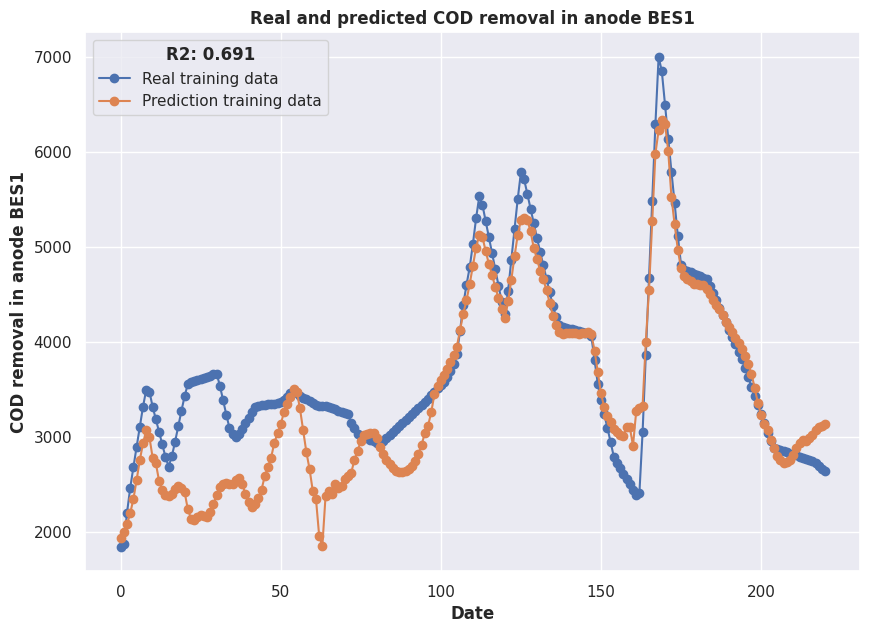

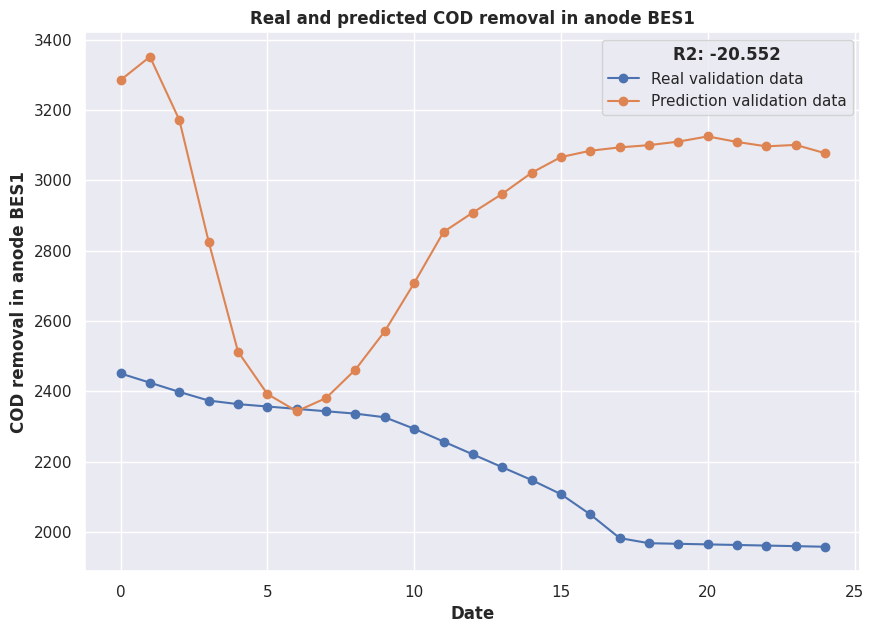

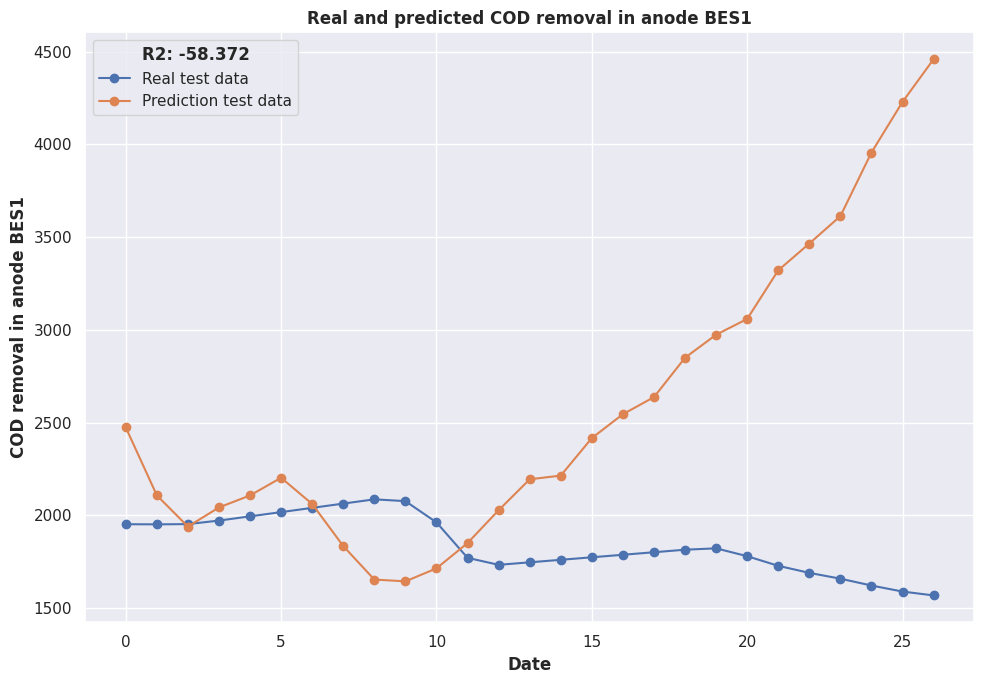

Mean Absolute Error (MAE) Train: 358.4162651806729
Max Error Train: 1472.1112107505096
MAPE Train: 0.10580203798872238
Root Mean Squared Error (RMSE) Train: 512.2735091864483
Mean Squared Error (MSE) Train: 262424.1482141981
Mean Absolute Error (MAE) Val: 720.3571761186125
Max Error Val: 1159.7621056775452
MAPE Val: 0.3434904800406322
Root Mean Squared Error (RMSE): 827.7197019537617
Mean Squared Error (MSE): 685119.9050024241
Mean Absolute Error (MAE) Test: 837.0915241261455
Max Error Test: 2892.729621257837
MAPE Test: 0.4892591528057084
Root Mean Squared Error (RMSE): 1176.7015660775405
Mean Squared Error (MSE): 1384626.5756093364


In [ ]:
def pred_plot(_y_train, _y_val, _y_test, output_index, number, model, col):
  pred_train = model.predict(X_train) * scaler.scale_[number] + scaler.mean_[number]
  pred_val = model.predict(X_val) * scaler.scale_[number] + scaler.mean_[number]
  # X_test =  X_val
  # y_test = pred_val
  pred_test = model.predict(X_test) * scaler.scale_[number] + scaler.mean_[number]

  pred_train = pred_train.flatten()
  pred_val = pred_val.flatten()
  pred_test = pred_test.flatten()

  y_train = _y_train * scaler.scale_[number] + scaler.mean_[number]
  y_val = _y_val * scaler.scale_[number] + scaler.mean_[number]
  y_test = _y_test * scaler.scale_[number] + scaler.mean_[number]
  # pred_test = y_test
  # Среднее значение predictions по измерению axis 0
  plt.figure(figsize=(10, 7))

  # График для pred_train

  plt.plot(y_train, marker='o', label='Real training data')
  plt.plot(pred_train, marker='o', label='Prediction training data')
  #plt.plot(ds30['CODcr(a) Anode Tank'][a[0]][window_size+forecast_horizon - 1:tr],  ds30['CODcr(a) Anode Tank'][a[0]][window_size+forecast_horizon - 1:tr], marker='o', color='red', label='Real training data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_train , pred_train):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  # График для pred_val
  plt.figure(figsize=(10, 7))
  plt.plot(y_val, marker='o', label='Real validation data')
  plt.plot(pred_val, marker='o', label='Prediction validation data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_val , pred_val):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  # График для pred_test
  plt.figure(figsize=(10, 7))
  plt.plot( y_test, marker='o', label='Real test data')
  plt.plot( pred_test, marker='o', label='Prediction test data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_test, pred_test):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  plt.tight_layout()
  plt.show()

  mae = mean_absolute_error(y_train, pred_train)
  maxae = max_error(y_train, pred_train)
  mape= mean_absolute_percentage_error(y_train, pred_train)
  rmse = np.sqrt(mean_squared_error(y_train, pred_train))
  mse = mean_squared_error(y_train, pred_train)

  print("Mean Absolute Error (MAE) Train:", mae)
  print("Max Error Train:", maxae)
  print("MAPE Train:", mape)
  print("Root Mean Squared Error (RMSE) Train:", rmse)
  print("Mean Squared Error (MSE) Train:", mse)

  mae = mean_absolute_error(y_val , pred_val)
  maxae = max_error(y_val , pred_val)
  mape= mean_absolute_percentage_error(y_val, pred_val)
  rmse = np.sqrt(mean_squared_error(y_val , pred_val))
  mse = mean_squared_error(y_val, pred_val)

  print("Mean Absolute Error (MAE) Val:", mae)
  print("Max Error Val:", maxae)
  print("MAPE Val:", mape)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Squared Error (MSE):", mse)

  mae = mean_absolute_error(y_test, pred_test)
  maxae = max_error(y_test, pred_test)
  mape= mean_absolute_percentage_error(y_test, pred_test)
  rmse = np.sqrt(mean_squared_error(y_test, pred_test))
  mse = mean_squared_error(y_test, pred_test)

  print("Mean Absolute Error (MAE) Test:", mae)
  print("Max Error Test:", maxae)
  print("MAPE Test:", mape)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Squared Error (MSE):", mse)

for i in range(features):
  if i == 0:
    pred_plot(y_train1[:, i], y_val1[:, i], y_test1[:, i], i, i, model, 'COD removal in anode BES1')
  if i == 1:
    pred_plot(y_train1[:, i], y_val1[:, i], y_test1[:, i], i, i, model, 'COD in anode tank')

In [ ]:
from keras.regularizers import l1_l2
input_layer = Input(shape=(window_size, data1.shape[1]))
conv1d = Conv1D(100, 7, activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.3)(conv1d)
max1 = MaxPooling1D(3)(drop1)
lstm1 = LSTM(100, kernel_regularizer=l1_l2(l1=0.001, l2=0.001), recurrent_regularizer=l1_l2(l1=0.001, l2=0.001), bias_regularizer=l1_l2(l1=0.001, l2=0.001), return_sequences=True)(max1)
bn1 = BatchNormalization()(lstm1)
lstm2 = LSTM(100, kernel_regularizer=l1_l2(l1=0.001, l2=0.001), recurrent_regularizer=l1_l2(l1=0.001, l2=0.001), bias_regularizer=l1_l2(l1=0.001, l2=0.001))(bn1)
bn2 = BatchNormalization()(lstm2)
drop2 = Dropout(0.2)(bn2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', kernel_regularizer=l1_l2(l1=0.001, l2=0.001), bias_regularizer=l1_l2(l1=0.001, l2=0.001), name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0001)  # Пример параметра learning rate
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=4, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
56/56 - 6s - loss: 10.1985 - mae: 1.0416 - mape: 916.4863 - val_loss: 9.3522 - val_mae: 0.9293 - val_mape: 90.5763 - 6s/epoch - 115ms/step
Epoch 2/500
56/56 - 1s - loss: 9.7411 - mae: 0.8717 - mape: 1202.3068 - val_loss: 9.3007 - val_mae: 0.9237 - val_mape: 89.9120 - 510ms/epoch - 9ms/step
Epoch 3/500
56/56 - 1s - loss: 9.4600 - mae: 0.8303 - mape: 778.9467 - val_loss: 9.2551 - val_mae: 0.9240 - val_mape: 90.0167 - 534ms/epoch - 10ms/step
Epoch 4/500
56/56 - 0s - loss: 9.5304 - mae: 0.8556 - mape: 828.5242 - val_loss: 8.9475 - val_mae: 0.7701 - val_mape: 74.6764 - 486ms/epoch - 9ms/step
Epoch 5/500
56/56 - 1s - loss: 9.3571 - mae: 0.8327 - mape: 811.6666 - val_loss: 8.7948 - val_mae: 0.6979 - val_mape: 67.8147 - 531ms/epoch - 9ms/step
Epoch 6/500
56/56 - 0s - loss: 9.1065 - mae: 0.7353 - mape: 907.0189 - val_loss: 8.6290 - val_mae: 0.6094 - val_mape: 60.1187 - 480ms/epoch - 9ms/step
Epoch 7/500
56/56 - 0s - loss: 9.0720 - mae: 0.7317 - mape: 700.7430 - val_loss: 8.5084 - va

In [ ]:
from keras.losses import mean_squared_logarithmic_error

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1_l2
l = 0.0005
input_layer = Input(shape=(window_size, data1.shape[1]))
conv1d = Conv1D(100, 7, activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.3)(conv1d)
max1 = MaxPooling1D(3)(drop1)
lstm1 = LSTM(100,  kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(max1)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(100, kernel_regularizer=l1_l2(l1=l, l2=l), recurrent_regularizer=l1_l2(l1=l, l2=l), bias_regularizer=l1_l2(l1=l, l2=l))(repeat)
drop2 = Dropout(0.2)(lstm2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear',  name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=mean_squared_logarithmic_error, metrics=['mae', 'mape'])
histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=2000, batch_size=4, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/2000
56/56 - 35s - loss: 3.4457 - mae: 0.7108 - mape: 446.7525 - val_loss: 2.2916 - val_mae: 0.7879 - val_mape: 76.6743 - 35s/epoch - 624ms/step
Epoch 2/2000
56/56 - 0s - loss: 1.8659 - mae: 0.6264 - mape: 246.7827 - val_loss: 1.0838 - val_mae: 0.9568 - val_mape: 93.4026 - 478ms/epoch - 9ms/step
Epoch 3/2000
56/56 - 0s - loss: 0.8749 - mae: 0.5219 - mape: 408.2187 - val_loss: 0.5121 - val_mae: 0.5283 - val_mape: 50.7866 - 479ms/epoch - 9ms/step
Epoch 4/2000
56/56 - 1s - loss: 0.4049 - mae: 0.4836 - mape: 611.8848 - val_loss: 0.2916 - val_mae: 0.5772 - val_mape: 55.6916 - 595ms/epoch - 11ms/step
Epoch 5/2000
56/56 - 1s - loss: 0.2792 - mae: 0.4870 - mape: 648.4584 - val_loss: 0.2377 - val_mae: 0.6371 - val_mape: 61.4572 - 582ms/epoch - 10ms/step
Epoch 6/2000
56/56 - 1s - loss: 0.2400 - mae: 0.4485 - mape: 562.0284 - val_loss: 0.2087 - val_mae: 0.6197 - val_mape: 59.4749 - 625ms/epoch - 11ms/step
Epoch 7/2000
56/56 - 0s - loss: 0.2134 - mae: 0.4069 - mape: 519.3195 - val_loss: 0.

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
conv1d = Conv1D(100, 7, activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.3)(conv1d)
max1 = MaxPooling1D(3)(drop1)
# conv1d1 = Conv1D(50, 9, activation='relu', padding='same')(max1)
# drop3 = Dropout(0.2)(conv1d1)
# max2 = MaxPooling1D(9)(drop3)
lstm1 = LSTM(36)(max1)
drop2 = Dropout(0.3)(lstm1)
# dense1 = Dense(64, activation='relu')(drop2)
# drop3 = Dropout(0.5)(dense1)
# dense2 = Dense(150, activation='relu')(dense1)
# dense3 = Dense(75, activation='relu')(dense2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=2, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/100
110/110 - 3s - loss: 0.0698 - mae: 0.2066 - mape: 623.7043 - val_loss: 0.0085 - val_mae: 0.0685 - val_mape: 25.5072 - 3s/epoch - 30ms/step
Epoch 2/100
110/110 - 1s - loss: 0.0230 - mae: 0.1154 - mape: 511.0929 - val_loss: 0.0115 - val_mae: 0.0880 - val_mape: 38.3575 - 627ms/epoch - 6ms/step
Epoch 3/100
110/110 - 1s - loss: 0.0127 - mae: 0.0863 - mape: 347.3666 - val_loss: 0.0119 - val_mae: 0.0864 - val_mape: 36.8444 - 655ms/epoch - 6ms/step
Epoch 4/100
110/110 - 1s - loss: 0.0126 - mae: 0.0848 - mape: 82.0032 - val_loss: 0.0209 - val_mae: 0.1327 - val_mape: 55.4610 - 560ms/epoch - 5ms/step
Epoch 5/100
110/110 - 1s - loss: 0.0141 - mae: 0.0907 - mape: 407.9599 - val_loss: 0.0223 - val_mae: 0.1374 - val_mape: 59.3942 - 566ms/epoch - 5ms/step
Epoch 6/100
110/110 - 0s - loss: 0.0133 - mae: 0.0882 - mape: 268.6533 - val_loss: 0.0216 - val_mae: 0.1330 - val_mape: 56.6527 - 497ms/epoch - 5ms/step
Epoch 7/100
110/110 - 0s - loss: 0.0123 - mae: 0.0814 - mape: 563.3958 - val_loss: 0.

KeyboardInterrupt: ignored

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]))
conv1d = Conv1D(100, 7, activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.3)(conv1d)
max1 = MaxPooling1D(3)(drop1)
lstm1 = LSTM(50)(max1)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(50)(repeat)
drop2 = Dropout(0.2)(lstm2)
# dense1 = Dense(64, activation='relu')(drop2)
# drop3 = Dropout(0.5)(dense1)
# dense2 = Dense(150, activation='relu')(dense1)
# dense3 = Dense(75, activation='relu')(dense2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=2, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/100
111/111 - 7s - loss: 0.2559 - mae: 0.3513 - mape: 255.3424 - val_loss: 0.9025 - val_mae: 0.9303 - val_mape: 90.9594 - 7s/epoch - 67ms/step
Epoch 2/100
111/111 - 1s - loss: 0.1403 - mae: 0.2543 - mape: 191.8920 - val_loss: 0.8356 - val_mae: 0.8919 - val_mape: 86.5173 - 737ms/epoch - 7ms/step
Epoch 3/100
111/111 - 1s - loss: 0.0955 - mae: 0.2023 - mape: 120.5392 - val_loss: 0.6618 - val_mae: 0.7933 - val_mape: 76.7101 - 762ms/epoch - 7ms/step
Epoch 4/100
111/111 - 1s - loss: 0.0467 - mae: 0.1585 - mape: 173.5541 - val_loss: 0.6935 - val_mae: 0.8101 - val_mape: 78.1561 - 739ms/epoch - 7ms/step
Epoch 5/100
111/111 - 1s - loss: 0.0435 - mae: 0.1460 - mape: 103.8614 - val_loss: 0.6376 - val_mae: 0.7789 - val_mape: 75.3487 - 762ms/epoch - 7ms/step
Epoch 6/100
111/111 - 1s - loss: 0.0583 - mae: 0.1675 - mape: 112.1608 - val_loss: 0.8321 - val_mae: 0.8884 - val_mape: 85.7771 - 714ms/epoch - 6ms/step
Epoch 7/100
111/111 - 1s - loss: 0.0370 - mae: 0.1433 - mape: 103.6678 - val_loss: 0

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]))
conv1d = Conv1D(100, 2, activation='relu', padding='same')(input_layer)
# drop1 = Dropout(0.3)(conv1d)
# max1 = MaxPooling1D(9)(conv1d)
# conv1d1 = Conv1D(50, 9, activation='relu', padding='same')(max1)
# drop3 = Dropout(0.2)(conv1d1)
# max2 = MaxPooling1D(9)(drop3)
lstm1 = LSTM(50)(conv1d)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(50)(repeat)
drop2 = Dropout(0.2)(lstm2)
# dense1 = Dense(64, activation='relu')(drop2)
# drop3 = Dropout(0.5)(dense1)
# dense2 = Dense(150, activation='relu')(dense1)
# dense3 = Dense(75, activation='relu')(dense2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=50, batch_size=2, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/50
14/14 - 7s - loss: 0.0727 - mae: 0.2009 - mape: 67.1626 - val_loss: 0.0803 - val_mae: 0.2697 - val_mape: 128.1055 - 7s/epoch - 534ms/step
Epoch 2/50
14/14 - 0s - loss: 0.0325 - mae: 0.1344 - mape: 60.6740 - val_loss: 0.0330 - val_mae: 0.1694 - val_mape: 81.4971 - 122ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.0308 - mae: 0.1326 - mape: 52.7625 - val_loss: 0.0220 - val_mae: 0.1407 - val_mape: 67.2435 - 111ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0271 - mae: 0.1253 - mape: 43.7432 - val_loss: 0.0302 - val_mae: 0.1667 - val_mape: 79.0414 - 111ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0368 - mae: 0.1415 - mape: 47.0030 - val_loss: 0.0608 - val_mae: 0.2402 - val_mape: 112.5836 - 108ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0286 - mae: 0.1264 - mape: 50.5859 - val_loss: 0.0489 - val_mae: 0.2147 - val_mape: 100.9612 - 126ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0185 - mae: 0.0940 - mape: 38.2833 - val_loss: 0.0262 - val_mae: 0.1557 

In [ ]:
input_layer = Input(shape=(window_size, data1.shape[1]-1))
conv1d = Conv1D(256, 45, activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.5)(conv1d)
max1 = MaxPooling1D(9)(drop1)

lstm1 = LSTM(128, return_sequences=True)(max1)
lstm2 = LSTM(128, return_sequences=True)(lstm1)
lstm3 = LSTM(64, return_sequences=True)(lstm2)
lstm4 = LSTM(64)(lstm3)
drop2 = Dropout(0.5)(lstm4)

outputs = []
for i in range(features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))

model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])

histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=300, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/300
44/44 - 9s - loss: 0.0775 - mae: 0.2229 - mape: 1738.0297 - val_loss: 0.0173 - val_mae: 0.1183 - val_mape: 55.4297 - 9s/epoch - 200ms/step
Epoch 2/300
44/44 - 1s - loss: 0.0281 - mae: 0.1253 - mape: 95.1342 - val_loss: 0.0663 - val_mae: 0.2407 - val_mape: 103.2432 - 671ms/epoch - 15ms/step
Epoch 3/300
44/44 - 1s - loss: 0.0207 - mae: 0.1121 - mape: 260.5020 - val_loss: 0.0545 - val_mae: 0.2234 - val_mape: 95.1752 - 666ms/epoch - 15ms/step
Epoch 4/300
44/44 - 1s - loss: 0.0193 - mae: 0.1096 - mape: 977.6431 - val_loss: 0.0414 - val_mae: 0.1938 - val_mape: 83.1492 - 673ms/epoch - 15ms/step
Epoch 5/300
44/44 - 1s - loss: 0.0155 - mae: 0.0954 - mape: 483.5252 - val_loss: 0.0692 - val_mae: 0.2475 - val_mape: 103.5389 - 574ms/epoch - 13ms/step
Epoch 6/300
44/44 - 1s - loss: 0.0165 - mae: 0.0980 - mape: 133.8353 - val_loss: 0.0349 - val_mae: 0.1791 - val_mape: 76.4096 - 668ms/epoch - 15ms/step
Epoch 7/300
44/44 - 1s - loss: 0.0201 - mae: 0.1090 - mape: 887.6942 - val_loss: 0.0438 

KeyboardInterrupt: ignored

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
conv1d = Conv1D(150, 9, activation='relu', padding='same')(input_layer)
max1 = MaxPooling1D(9)(conv1d)
lstm1 = LSTM(100, return_sequences=True)(input_layer)
drop1 = Dropout(0.1)(lstm1)
lstm2 = LSTM(100, return_sequences=True)(drop1)
drop2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(50)(drop2)
drop3 = Dropout(0.5)(lstm3)
#dense1 = Dense(100, activation='relu')(drop3)
# lstm4 = LSTM(50, return_sequences=True)(drop3)
# drop4 = Dropout(0.2)(lstm4)
# lstm5 = LSTM(50)(drop4)
# drop5 = Dropout(0.2)(lstm5)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop3))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
50/50 - 8s - loss: 0.0515 - mae: 0.1673 - mape: 409.6251 - val_loss: 0.0287 - val_mae: 0.1646 - val_mape: 107.0325 - 8s/epoch - 161ms/step
Epoch 2/500
50/50 - 1s - loss: 0.0275 - mae: 0.1279 - mape: 467.1838 - val_loss: 0.0267 - val_mae: 0.1548 - val_mape: 100.4226 - 1s/epoch - 23ms/step
Epoch 3/500
50/50 - 1s - loss: 0.0295 - mae: 0.1337 - mape: 327.9519 - val_loss: 0.0232 - val_mae: 0.1364 - val_mape: 90.3296 - 1s/epoch - 23ms/step
Epoch 4/500
50/50 - 1s - loss: 0.0269 - mae: 0.1242 - mape: 639.6690 - val_loss: 0.0171 - val_mae: 0.1079 - val_mape: 67.4986 - 1s/epoch - 24ms/step
Epoch 5/500
50/50 - 1s - loss: 0.0277 - mae: 0.1291 - mape: 565.6846 - val_loss: 0.0312 - val_mae: 0.1702 - val_mape: 109.5996 - 1s/epoch - 23ms/step
Epoch 6/500
50/50 - 1s - loss: 0.0257 - mae: 0.1256 - mape: 671.1807 - val_loss: 0.0360 - val_mae: 0.1778 - val_mape: 114.8479 - 1s/epoch - 23ms/step
Epoch 7/500
50/50 - 1s - loss: 0.0232 - mae: 0.1143 - mape: 109.3351 - val_loss: 0.0539 - val_mae: 0.

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(100, return_sequences=True)(input_layer)
lstm2 = LSTM(50, return_sequences=True)(lstm1)
lstm3 = LSTM(50)(lstm2)
dense1 = Dense(100, activation='relu')(lstm3)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(dense1))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/100
303/303 - 21s - loss: 0.0279 - mae: 0.1238 - mape: 265.0981 - val_loss: 0.0603 - val_mae: 0.1897 - val_mape: 34.6649 - 21s/epoch - 69ms/step
Epoch 2/100
303/303 - 11s - loss: 0.0175 - mae: 0.0986 - mape: 52.7777 - val_loss: 0.0594 - val_mae: 0.1979 - val_mape: 39.0072 - 11s/epoch - 36ms/step
Epoch 3/100
303/303 - 11s - loss: 0.0162 - mae: 0.0937 - mape: 80.0443 - val_loss: 0.0671 - val_mae: 0.1978 - val_mape: 32.6233 - 11s/epoch - 37ms/step
Epoch 4/100
303/303 - 12s - loss: 0.0156 - mae: 0.0914 - mape: 73.5649 - val_loss: 0.0635 - val_mae: 0.2036 - val_mape: 37.0609 - 12s/epoch - 39ms/step
Epoch 5/100
303/303 - 12s - loss: 0.0150 - mae: 0.0872 - mape: 68.9700 - val_loss: 0.0626 - val_mae: 0.1949 - val_mape: 33.5323 - 12s/epoch - 39ms/step
Epoch 6/100
303/303 - 12s - loss: 0.0147 - mae: 0.0875 - mape: 54.8856 - val_loss: 0.0628 - val_mae: 0.1891 - val_mape: 33.3446 - 12s/epoch - 40ms/step
Epoch 7/100
303/303 - 12s - loss: 0.0129 - mae: 0.0801 - mape: 61.4268 - val_loss: 0.05

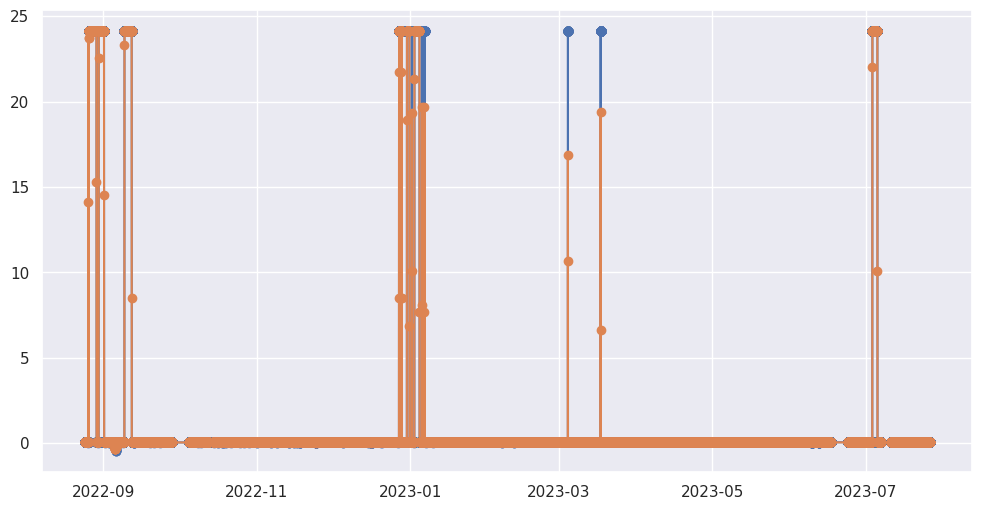

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ds1['Anode tank float'], marker='o')
ax.plot(ds111['Anode tank float'], marker='o')

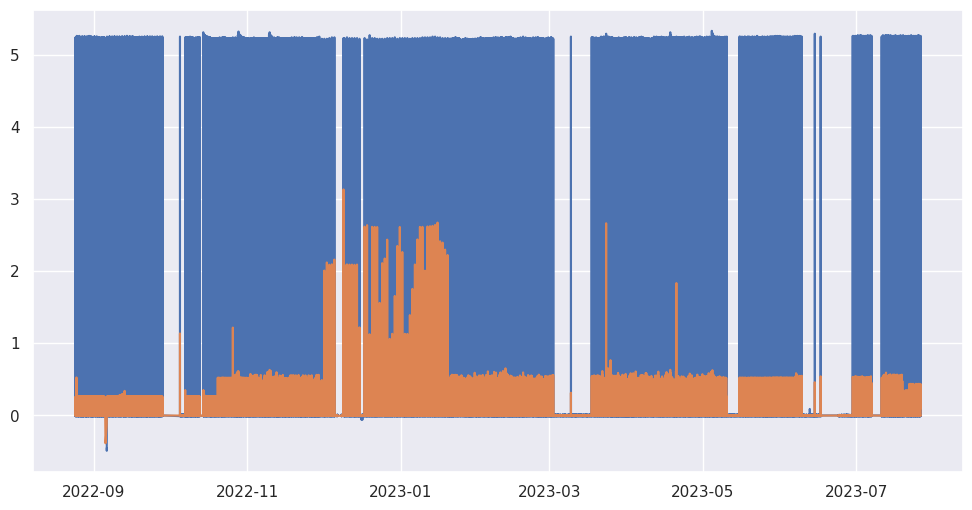

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ds1['Cathode pump #2'])
ax.plot(ds111['Cathode pump #2'])

In [ ]:
ds1['CODcr(a) Anode Tank'].mean()

2962.340425531915

In [ ]:
ds1['CODcr(a) Anode Tank'].mean()

2962.340425531915

In [ ]:
ds1['CODcr(a) #2-out'']

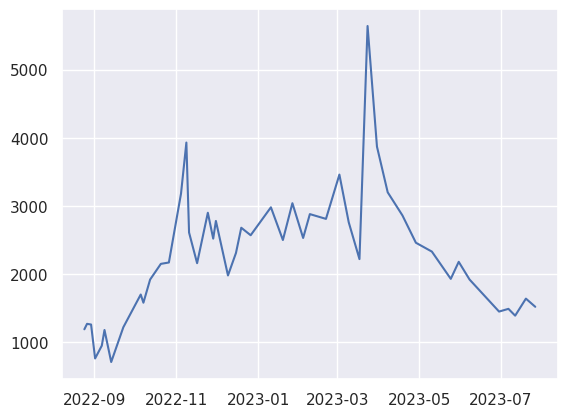

In [ ]:
plt.plot(ds1['CODcr(a) #2-out'].dropna())

In [ ]:
# Best in the best
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(150)(input_layer)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(150)(repeat)
drop2 = Dropout(0.2)(lstm2)
Dense1 = Dense(100, activation='relu')(drop2)
Dense2 = Dense(50, activation='relu')(Dense1)
drop3 = Dropout(0.2)(Dense2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop3))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=200, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/200
44/44 - 6s - loss: 0.0432 - mae: 0.1551 - mape: 532.7692 - val_loss: 0.0372 - val_mae: 0.1867 - val_mape: 79.4060 - 6s/epoch - 135ms/step
Epoch 2/200
44/44 - 1s - loss: 0.0166 - mae: 0.0956 - mape: 197.8625 - val_loss: 0.0246 - val_mae: 0.1486 - val_mape: 63.0608 - 713ms/epoch - 16ms/step
Epoch 3/200
44/44 - 1s - loss: 0.0152 - mae: 0.0918 - mape: 283.6942 - val_loss: 0.0271 - val_mae: 0.1552 - val_mape: 65.0931 - 718ms/epoch - 16ms/step
Epoch 4/200
44/44 - 1s - loss: 0.0125 - mae: 0.0788 - mape: 265.9056 - val_loss: 0.0339 - val_mae: 0.1688 - val_mape: 70.3162 - 780ms/epoch - 18ms/step
Epoch 5/200
44/44 - 1s - loss: 0.0110 - mae: 0.0756 - mape: 92.1718 - val_loss: 0.0206 - val_mae: 0.1289 - val_mape: 53.6288 - 795ms/epoch - 18ms/step
Epoch 6/200
44/44 - 1s - loss: 0.0116 - mae: 0.0782 - mape: 205.1381 - val_loss: 0.0190 - val_mae: 0.1238 - val_mape: 51.2817 - 715ms/epoch - 16ms/step
Epoch 7/200
44/44 - 1s - loss: 0.0142 - mae: 0.0882 - mape: 292.2863 - val_loss: 0.0179 - v

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(100)(input_layer)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(100)(repeat)
drop2 = Dropout(0.2)(lstm2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/100
43/43 - 5s - loss: 0.0798 - mae: 0.2203 - mape: 206.8689 - val_loss: 0.0117 - val_mae: 0.0915 - val_mape: 44.6198 - 5s/epoch - 116ms/step
Epoch 2/100
43/43 - 1s - loss: 0.0308 - mae: 0.1365 - mape: 130.0573 - val_loss: 0.0141 - val_mae: 0.1109 - val_mape: 50.4469 - 1s/epoch - 26ms/step
Epoch 3/100
43/43 - 1s - loss: 0.0258 - mae: 0.1215 - mape: 83.0199 - val_loss: 0.0330 - val_mae: 0.1753 - val_mape: 78.2670 - 1s/epoch - 28ms/step
Epoch 4/100
43/43 - 1s - loss: 0.0274 - mae: 0.1327 - mape: 127.4162 - val_loss: 0.0227 - val_mae: 0.1422 - val_mape: 64.5962 - 1s/epoch - 25ms/step
Epoch 5/100
43/43 - 1s - loss: 0.0242 - mae: 0.1193 - mape: 96.6922 - val_loss: 0.0201 - val_mae: 0.1349 - val_mape: 59.6645 - 932ms/epoch - 22ms/step
Epoch 6/100
43/43 - 1s - loss: 0.0221 - mae: 0.1157 - mape: 44.7373 - val_loss: 0.0258 - val_mae: 0.1539 - val_mape: 68.8816 - 893ms/epoch - 21ms/step
Epoch 7/100
43/43 - 1s - loss: 0.0245 - mae: 0.1219 - mape: 95.4976 - val_loss: 0.0357 - val_mae: 0.18